# **TTI109 - Estatística**
# **Aula 03 - Estatística Descritiva 02**

Nessa aula vamos aprender a construir:

* Histogramas de frequência relativa;
* Ogivas (gráficos de frequência acumulada);
* Gráficos setoriais (pizza);
* Gráficos de Pareto;
* Gráficos de dispersão;
* Séries temporais.

## **Conjunto de dados e distribuição de frequência**

O conjunto de dados a seguir lista os preços (em dólares) de 30 aparelhos
GPS (global positioning system) portáteis. A distribuição de frequência deve ter sete classes.

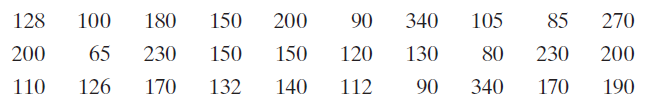

In [ ]:
# frequencia é o numero de vezes que ocorre aquele intervalo analisado
# distribuição de frequencia é uma tabela que mostra classes ou intervalos dos valores com a contagem do numero de ocorrencias de cada classe ou intervalo (conhecido com frequencia)

# limite inferior é o menor numero de uma classe x
# limite superior é o maior numero da mesma classe x

# o limite inferior é montado a partir do menor valor e vai somando a amplitude de classe ate completar o numero de classes que os dados tem
# o limite superior é montado a pártir de um primeiro numero que é arbitrario (geralmente recomenda-se pegar o segundo numero do limite inferior e subtrair uma unidade) e ir somando a amplitude tambem

# valor minimo é o menor numero de todos os dados
# valor maximo é o maior numero de todos os dos dados

# amplitude da distribuição é o valor maximo - o valor minimo
# amplitudo de classe é a amplitude da distribuição / numero de classes

# frequencia realtiva é a frequencia da classe analisada /quantidade total de dados na amaostra -> é a quantidade de vezes que aquilo aparece em realação ao contexto.
# frequencia acumulada é a soma da frequencia da classe atual com todas as anteirores, a frequencia acumulada da ultima classe é igual a tamanho n da amostra
# (tamanho n da amostra = quantidade total de dados na amaostra) -> frequencia cumulada é a quantidade de dados que aparecem em um determinado periodo em um determindao contexto


# ponto médio é o limite superior da classe + limite inferior da classe / 2


# fronteira das classes voce subtrai 0.5 do limite inferior e monta as classes com base nesse resultado que deu após essa subtração de 0.5.
# ou seja, se a primeira classe for 65 - 104, voce subtrai 0.5 de 65 e adiciona normal a amplitude de classe subsequentemente aos outros valores.
# Ficando assim: 64.5 - 104.5 na primeira classe (fronteira superior é o 104,5 e fronteira inferior é 64.5), por exemplo. Se na segunda for 104,5-144,5(fronteira superior é o 144,5 e fronteira inferior é 104,5) vai ficar 104.5- 144.5, e assim vai indo.

# histograma de frequencia é um digrama de barras que representa a distribiução de frequencia de um conjunto de dados
# eixo vertical com as frequencias das classes
# eixo horizontal ou com os pontos medios ou com as fronteiras estabelecidas pelas classes nos vertices da barrinha do grafico encostadas um nas outras

# poligono de frequencia é um grafico de linha que enfatiza as mudanças continuas na frequencia
# podemos fazer o grafico de poligono de frequencia graduando o eixo x com os pontos medios das classes, sendo que o primeiro e ultimo deles são pontos medios ficticios. E no eixo y coloque o intrvalo das frequencias das classes
# pontos medio ficticios, como construir: subtraia a amplitude de classe do primeiro ponto medio e adicione o primeiro ponto do grafico e adicione a amplitude de classe no ultimo ponto medio e assinale o ultimo ponto do granfico


In [ ]:
import pandas as pd
from math import ceil

# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
# pd.Series(...): Aqui, está sendo criada uma Pandas Series. A função pd.Series() é usada para criar uma estrutura de dados unidimensional que é uma parte fundamental do Pandas. Os valores entre os parênteses [...] representam os elementos da Series. No seu caso, você está criando uma Series com 30 números inteiros.




# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7




# Distribuição de frequência
dist = data.value_counts(bins=7).sort_index()
# O método value_counts() é usado para contar a frequência de valores únicos dos dados que voce tem (Data),
# mas quando você passa o argumento bins=n_classes, ele agrupa os valores em intervalos/caixas (bins, que é o nuemro de classes)
# em vez de contar somente valores únicos.

# O método sort_index() é usado para ordenar os índices (classes) em ordem crescente.

#Isso tudo acima é armazenado na variavel dist




# Reconfiguração do conjunto de dados: Series para DataFrame
dist_freq = pd.DataFrame(dist)
dist_freq = dist_freq.reset_index()
dist_freq.columns = ['Classe', 'Frequência']
# dist_freq = pd.DataFrame(dist_freq): Esta linha está criando um novo DataFrame chamado dist_freq a partir
# dos dados contidos em dist. Isso efetivamente transformará sua Pandas Series em uma única coluna de um DataFrame.

# dist_freq = dist_freq.reset_index(): Resetar os índices de um DataFrame é útil quando você deseja redefinir os índices das
# linhas de um DataFrame após realizar operações que possam ter modificado os índices.


# dist_freq.columns = ['Classe', 'Frequência']: faz isso para nomear as colunas do dataframe de classe e frequencia




# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = ceil((v_max-v_min)/n_classes) #calculo da amplitude de classe (amplitude da distribuição / numero de classes) e arredondadno para cima com ceil (round tbm serveria)
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude) # montagem classe
# -> intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude):

# criando uma lista de classes com um intervalo de classe (range de intervalo) usando a função pd.interval_range()

# start=v_min: O parâmetro start especifica o valor mínimo para o início do primeiro intervalo. v_min é uma variável
# que deve conter o valor mínimo desejado para os intervalos.

# end=v_max: O parâmetro end especifica o valor máximo para o final do último intervalo. v_max é uma variável
# que deve conter o valor máximo desejado para os intervalos.

# freq=amplitude: O parâmetro freq especifica a amplitude ou tamanho dos intervalos. amplitude é uma variável que
# deve conter o tamanho desejado para cada intervalo.




# Atribuição dos intervalos para a coluna Classe
dist_freq['Classe'] = intervalos
# atribui ao dataframe dist_freq os intervalos (que calculamos acima) a coluna Classes




# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]
# nomeia cada intervalo das classes como inter e para cada intervalo inter nos intervalos (variavel que contem todas as classes) calcula o ponto medio desses inter




# Inserção da coluna Pontos médios
dist_freq['Pontos médios'] = pts_medios
#atribui ao dataframe dist_freq os pts_medios a uma nova coluna chamada 'Pontos médios'




# Cálculo e inserção das colunas de frequência relativa e acumulada
observacoes = len(data) #atribui a quantidade total de dados a variavel observações
dist_freq['Frequência relativa'] = dist_freq['Frequência']/observacoes #divide a frequencia pela quantidade total de dados  e atribui ao dataframe uma nova coluna criada chamada 'Frequência relativa
dist_freq['Frequência acumulada'] = dist_freq['Frequência'].cumsum() #vai acumulando todos os valores da coluna dist_freq['Frequência'] que ja esta no dataframe
# e atribui ao dataframe dist_freq a dist_freq['Frequência'].cumsum() a uma nova coluna chamada 'Frequência acumulada'

display(dist_freq)

,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,"(65, 105]",6,85.0,0.200000,6
1,"(105, 145]",9,125.0,0.300000,15
2,"(145, 185]",6,165.0,0.200000,21
3,"(185, 225]",4,205.0,0.133333,25
4,"(225, 265]",2,245.0,0.066667,27
5,"(265, 305]",1,285.0,0.033333,28
6,"(305, 345]",2,325.0,0.066667,30


## **Construção do histograma de frequência relativa**

---



A estratégia de construção é a mesma daquela utilizada para o histograma de frequência (absoluta). O histograma é construído usando o método `hist` do `Pandas`. A novidade é o uso do parâmetro `weights`, para a construção do eixo vertical calibrado em frequências relativas.

Diversas características do histograma, tais como as classes (parâmetro `bins`), cor das barras e marcações nos eixos vertical e horizontal são programáveis. Também é inserida a frequência relativa observada no topo de cada barra.

In [ ]:
#HISTOGRAMA DE FREQUENCIA RELATIVA
# -> mesmo eixo horizontal do histograma de frequencia (ou com os pontos medios das classes ou com as fronteiras estabelecidas pelas classes)
# -> o eixo vertical agora indica a frequencia relativa (e não a frequencia absoluta que nem no histograma de frequencia)
# -> podemos responder perguntas como: quantos navegadores custam 224,50 ou menos
# -> podemos responder tambem: em qual intervalo de preço ocorre aumento na frequencia acumulada

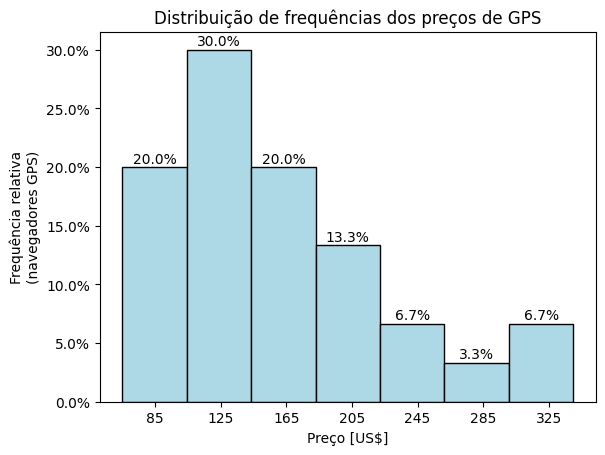

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import numpy as np

# Construção do histograma
histograma = data.hist(bins=n_classes, color='lightblue', edgecolor='black',
                       grid=False, weights=np.ones_like(data)/len(data))

# histograma = data.hist(...) -> cria um histograma (usando o método hist do Pandas) a partir dos dados contidos na variavel data
# - e atribui ele a variavel histograma.
# bins é o numero de classes que o enunciado dá
# color='lightblue': Este argumento define a cor preenchida das barras do histograma. No caso, as barras serão coloridas de azul claro.
# edgecolor='black': Este argumento define a cor da borda das barras do histograma. As bordas das barras serão pretas.
# grid=False: Este argumento controla se uma grade (grade de fundo) será desenhada no gráfico. Neste caso, está definido como False,
# - o que significa que não haverá uma grade de fundo.
# weights=np.ones_like(data)/len(data) é usado para a construção do eixo vertical calibrado em frequências relativas.




# Inserção de atributos ao gráfico
histograma.set(xlabel='Preço [US$]', #rotulo do eixo x
               ylabel='Frequência relativa\n(navegadores GPS)', #rotulo do eixo y
               title='Distribuição de frequências dos preços de GPS', #titulo do grafico
               xticks=dist_freq['Pontos médios']) #o eixo x pega os pontos medios do dataframe dist_freq e coloca no eixo x

# Inserção de rótulos nas barras do histograma
barras = histograma.patches # obtem uma lista de objetos de patch em que que representam as barras do histograma. Cada objeto de patch corresponde a uma barra no gráfico
freqs = dist_freq['Frequência relativa'] # obtendo as frequências relativas dos intervalos do histograma a partir dos dados do data frame dist_freq a na coluna ['Frequência relativa']. Esta variável (freqs) contém as frequências relativas associadas a cada intervalo do histograma.
ajuste_texto = 0.001 #atribui 0.001 ao ajuste_texto


# personalizando o gráfico de histograma criado anteriormente (atribuído à variável histograma) com rótulos, título e configurações adicionais.
for barra, freq in zip(barras, freqs):
    altura = barra.get_height() # Isso obtém a altura da barra atual. A altura representa a frequência de dados naquele intervalo.
    texto_freq = f'{freq*100:.1f}%' # formatando as frequências relativas (armazendas na freq) com uma casa decimal, multiplicando-a por 100 para obter a porcentagem e adicionando o símbolo de porcentagem '%' ao final.
    histograma.text(x=barra.get_x()+barra.get_width()/2, y=altura+ajuste_texto,
                    s=texto_freq, ha='center', va='bottom')
    # Este trecho de código adiciona o rótulo de frequência relativa na parte superior de cada barra.
    #  Os argumentos dentro do método text são os seguintes:
# x=barra.get_x()+barra.get_width()/2: Define a posição horizontal do texto como o centro da barra.
# y=altura+ajuste_texto: Define a posição vertical do texto um pouco acima da altura da barra.
# s=texto_freq: Define o texto do rótulo como a string formatada da frequência relativa.
# ha='center': Ajusta o alinhamento horizontal do texto para o centro da barra.
# va='bottom': Ajusta o alinhamento vertical do texto para a parte inferior da barra.

# Ajuste do eixo vertical para exibição das porcentagens
# personalização adicional de um gráfico antes de exibi-lo usando a biblioteca de plotagem (provavelmente Matplotlib) em Python.
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# plt.gca() obtém o eixo atual do gráfico (GCA significa "Get Current Axis").

# yaxis se refere ao eixo vertical (eixo Y).

# set_major_formatter(PercentFormatter(1)) -> está definindo o formato dos rótulos no eixo Y para serem exibidos como porcentagens.
# O PercentFormatter(1) é uma função de formatação que formata os números no formato de porcentagem.
# O argumento 1 passado para o PercentFormatter significa que os valores no eixo Y serão multiplicados por 1
# (ou seja, não haverá alteração nos valores), mas eles serão exibidos como porcentagens.
# Portanto, se você tiver um valor de 0,1 no eixo Y, ele será exibido como "10%" no gráfico.

## **Construção da ogiva (gráfico de frequência acumulada)**

Para construir o polígono de frequências, vamos empregar a biblioteca `matplotlib`.

In [ ]:
#GRAFICO DE FREQUENCIA ACUMULADA (OU OGIVAS)
# -> Para descrever um registro de dados que são menores que ou iguais que a um determinado valor limite, ai usa o grafico de frequencia acumulada.
# -> É um grafico de linhas que mostra a frequencia acumulada até cada classe em sua fronteira superior
# -> Fronteiras superiores das classes são marcadas no eixo horizontal
# -> Frequencias acumuladas são marcadas no eixo vertical

#COMO CONSTRUIR UM GRAFICO DE FRQUENCIA ACUMULADA (OU OGIVAS)
# -> 1: Construa um adistribuição de frequencia que incluia uma coluna com frequencias acumuladas

# -> 2: Especifique os eixos horizontal e vertical -> Fronteiras superiores das classes são marcadas no eixo horizontal (x)
# -> 2: Frequencias acumuladas são marcadas no eixo vertical (y)

# -> 3: Assinale os pontos que representam as fronteiras superiores das classes e as frequencias acumuladas correspondentes
# -> 3: Fronteira das classes voce subtrai 0.5 do limite inferior e monta as classes com base nesse resultado que deu após essa subtração de 0.5.
# ou seja, se a primeira classe for 65 - 104, voce subtrai 0.5 de 65 e adiciona normal a amplitude de classe subsequentemente aos outros valores.
# Ficando assim: 64.5 - 104.5 na primeira classe, por exemplo. Se na segunda for 105-144 vai ficar 104.5- 144.5, e assim vai indo.

# -> 4: Conecte os pontos em ordem da esquerda para a direita com segmentos lineares

# -> 5: O grafico deve começar na fronteira inferior da primeira classe (a frequencia acumulada é zero) e deve terminar na fronteira superior da ultima classe (a frequencia acumulada é igual ao tamanho da amostra)
# -> 5: A escala horizontal deve se iniciar na primeira fronteira inferior das classes (que no caso é 64,5 e terminar em 344,5) e terminar onde a frequencia acumulada é 30 (no caso 344,5)

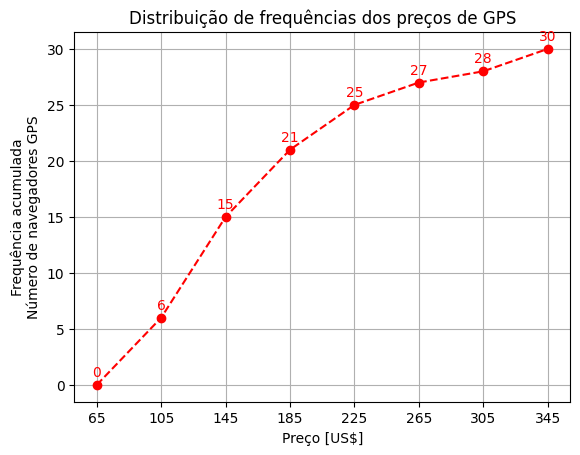

In [ ]:
# Construção dos dados: vamos usar os extremos direitos de cada classe
x_data = [dist_freq['Classe'][0].left] + [extremos.right for extremos in dist_freq['Classe']]

# -> Faz uma lista com todas as classes do data frame dist_freq (que é uma tabela de distribuição de frequencia):
# x_data: Esta linha cria uma lista chamada x_data, que contém os valores dos extremos esquerdos de cada classe.
# O primeiro valor é obtido da primeira classe (dist_freq['Classe'][0].left) e, em seguida, são adicionados os valores dos extremos
# direitos de todas as outras classes ([extremos.right for extremos in dist_freq['Classe']]).


y_data = [0] + list(dist_freq['Frequência acumulada'])
# y_data: Esta linha cria uma lista chamada y_data, que contém as frequências acumuladas.

# -> como a fre quencia acumulada é calculada:
# Inicialmente, é adicionado um valor zero (0) para representar a frequência acumulada antes do primeiro intervalo de classe, e depois
# são adicionadas as frequências acumuladas (classe que esta no dataframe dist_freq que contem a classe frequencias acumuladas) de todas
# as classes -> (list(dist_freq['Frequência acumulada'])

# Plotagem da ogiva, com diversos atributos
plt.plot(x_data, y_data,'ro--') # Esta linha cria um gráfico de ogiva, onde x_data são os pontos no eixo x e y_data são os pontos no eixo y. O 'ro--' define o estilo do gráfico, onde 'ro' significa que os pontos serão marcados como círculos vermelhos e '--' significa que uma linha tracejada será usada para conectá-los.
plt.xlabel('Preço [US$]') # Define o rótulo do eixo x como "Preço [US$]".
plt.ylabel('Frequência acumulada\nNúmero de navegadores GPS') # Define o rótulo do eixo y como "Frequência acumulada\nNúmero de navegadores GPS".
plt.title('Distribuição de frequências dos preços de GPS') #titulo do grafico
plt.xticks(x_data) #: Define os marcadores no eixo x para coincidirem com os valores em x_data. Isso garante que os valores no eixo x sejam exibidos nos locais corretos.
plt.grid() #: Adiciona uma grade de fundo ao gráfico para facilitar a leitura das coordenadas.

# Registro das frequências acumuladas
for x, y in zip(x_data, y_data):
  plt.text(x=x, y=y+0.5, s=f'{y}', ha='center', va='bottom', color='red')
plt.show()

# -> Este loop itera sobre os pares de coordenadas (x, y) em x_data e y_data.
# -> plt.text(...): Dentro do loop, o código adiciona um rótulo de texto com as coordenadas (x, y) acima de cada ponto no gráfico.
# -> O texto consiste na frequência acumulada correspondente. O argumento color='red' define a cor do texto como vermelho

In [ ]:
# Concluimos que:
# -> Quantos navegadores gps custam 224,50 ou menos? -> 25 navegadores gps
# -> Em qual intervalo de preço ocorre o maior aumento na frequencia acumulada? -> O maior aumento na frequencia acumulada
# ocorre entre 105 e 145, uma vez que a linha [e mais inclinada nessa parte


Vamos agora empregar as frequências relativas na construção da ogiva.

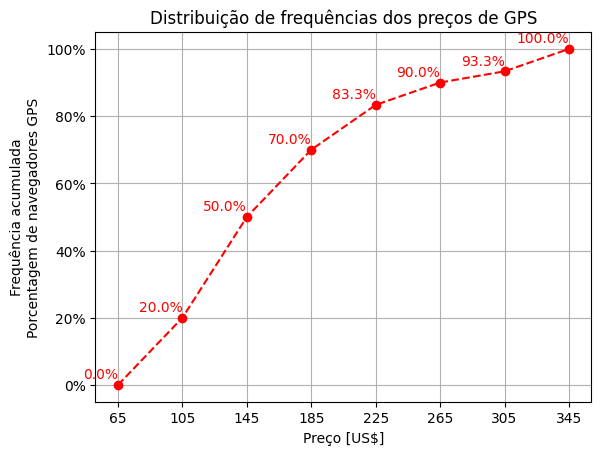

In [ ]:
# Construção dos dados: vamos usar os extremos direitos de cada classe
x_data = [dist_freq['Classe'][0].left] + [extremos.right for extremos in dist_freq['Classe']] #x_data contém os extremos esquerdos de cada classe
y_data = np.array([0] + list(dist_freq['Frequência acumulada']))/observacoes #y_data contém as frequências acumuladas, mas elas são normalizadas para representar a porcentagem.

# Plotagem da ogiva, com diversos atributos
plt.plot(x_data, y_data,'ro--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência acumulada\nPorcentagem de navegadores GPS')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.grid()

# Registro das porcentagens acumuladas
for x, y in zip(x_data, y_data):
  plt.text(x=x, y=y+0.01, s=f'{y*100:.1f}%',
           ha='right', va='bottom', color='red')

# Ajuste do eixo vertical para exibição das porcentagens
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [ ]:
# 50% dos gps custam até 145 reais

## **Construindo um gráfico de pizza**
O gráfico setorial (circular), ou gráfico de pizza, é criado usando o método `pie` (torta) do `matplotlib`. O conjunto de dados é criado usando o `Pandas`, sendo os valores das colunas representados como uma lista de listas.

In [ ]:
# GRAFICOS DE PIZZA (SETORIAIS):
# -> Fornecem uma maneira conveniente de apresentar graficamente dados QUALITATIVOS, como PERCENTAGENS de um todo
# -> É um circulo dividido em setores que represetnam categorias.
# -> A area de cada setor é proporcional a frequencia de cada categoria

# COMO CONSTRUIR:
# -> 1: Calcule a frequencia realtiva,ou percentagem, (frequencia realtiva é a frequencia da classe analisada / quantidade total de dados na amostra),
# de cada categoria
# -> 2: Construa um grafico de pizza usando o angulo central que corresponde a cada categoria
# -> 3: Para determinar o angulo central de cada categoria, multiplique 360 pela frequencia relativa da categoria

,Título,Frequência,Porcentagem
0,Tecnólogo,942,26.512806
1,Bacharelado,1716,48.297214
2,Mestrado,731,20.574163
3,Doutorado,164,4.615818


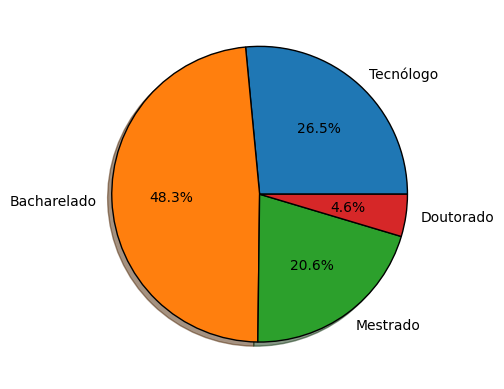

In [ ]:
# Criação do conjunto de dados


dados = [['Tecnólogo', 942], ['Bacharelado', 1716],
         ['Mestrado', 731], ['Doutorado', 164]]

# dados: estrutura de dados que pode ser usada para armazenar informações sobre o número de pessoas com diferentes níveis de
# formação educacional. Cada sublista se relaciona um nível de formação a uma contagem.
#Por exemplo, há 942 pessoas com nível de formação "Tecnólogo", 1716 com "Bacharelado", 731 com "Mestrado" e 164 com "Doutorado".


tabela = pd.DataFrame(dados, columns=['Título', 'Frequência'])
# Cria um dataframe (usando a função DataFrame da biblioteca pandas.)
# Dados contém os dados que você deseja inserir no DataFrame
# Columns=['Título', 'Frequência']: Este argumento especifica os nomes das colunas do DataFrame.
#em que você está nomeando as colunas como 'Título' e 'Frequência'.



tabela['Porcentagem'] = tabela['Frequência']/tabela['Frequência'].sum()*100
#adiciona ao dataframe tabela a coluna porcentagem, dividindo a frequencia da tabela pela soma de todas as frequencias -> isso é como calcula a frequencia realtiva (dividindo a
# frequncia da classe analisada pela quantidade de todos os dados)
#eu multipliquei por 100 pra ja sair em porcentagem

# tabela['Porcentagem'] = tabela['Frequência']/tabela['Frequência'].sum()*360 -> como eu to multiplicando por 360 a frequencia relativa eu vou descobrir o angulo de cada setor no circulo
display(tabela)

# Cria Gráfico de pizza
pizza = plt.pie(x=tabela['Porcentagem'], labels=tabela['Título'],
                autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'},
                shadow=True)

# x=tabela['Frequência'] -> Define os valores que serão usados para criar as fatias do gráfico. Usando a coluna 'Frequência' do DataFrame tabela para isso.
# labels=tabela['Título'] -> Especifica os rótulos de cada fatia que serão associados a cada fatia do gráfico. Os rótulos vêm da coluna 'Título' do DataFrame tabela.
# '%1.1f%%' significa que os percentuais serão formatados com uma casa decimal e seguidos pelo símbolo de porcentagem '%
# wedgeprops={'edgecolor': 'black'}: Isso define as propriedades das fatias do gráfico. Neste caso, as bordas das fatias serão pretas para destacar as divisões entre elas.
# shadow=True: Adiciona sombras às fatias do gráfico para dar uma sensação tridimensional.

plt.show()

## **Construindo um gráfico de Pareto**
Note que o conjunto de dados é criado novamente usando o `Pandas`, porém empregando um dicionário para representar a coluna de valores. Também será incluída a representação de porcentagem acumulada.

In [ ]:
#GRAFICO DE PARETO
# -> É um grafico de barras verticais no qual a altura de cada barra representa ou a frequencia ou a frequencia relativa
# -> as barras são posicionadas em ordem crescente com a barra mais alta posicionada a esquerda

,Valores,PorcAcum
Roubo\nfuncionários,15.1,43.895349
Roubo\nlojas,12.3,79.651163
Erro\nAdm,4.2,91.860465
Fraude\nvendas,1.7,96.802326
Desconhecida,1.1,100.000000


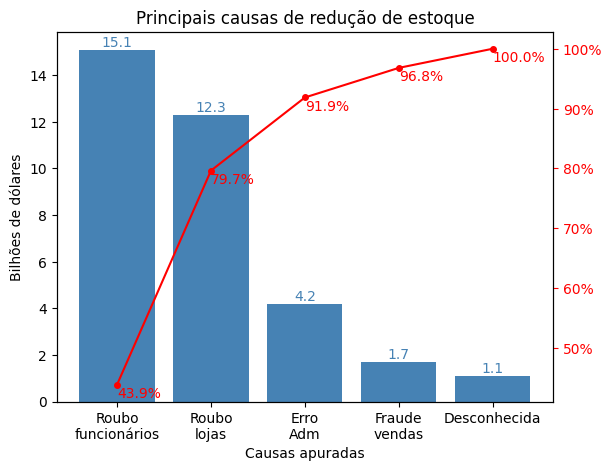

In [ ]:
# Criação do conjunto de dados
dados = pd.DataFrame({'Valores': [4.2, 15.1, 12.3, 1.1, 1.7]})
dados.index = ['Erro\nAdm', 'Roubo\nfuncionários',
               'Roubo\nlojas', 'Desconhecida', 'Fraude\nvendas']
# Aqui, um DataFrame do pandas chamado dados é criado com uma coluna chamada 'Valores'. Essa coluna contém os valores associados a cada categoria.
# dados.index -> São definidos os rótulos das linhas do DataFrame para descrever as categorias correspondentes.



# Organizando os dados em ordem decrescente
dados = dados.sort_values(by='Valores', ascending=False) # Os dados do dataframe são organizados em ordem decrescente com base nos valores da coluna 'Valores'.

# Criando a coluna da porcentagem acumulada
dados['PorcAcum'] = dados['Valores'].cumsum()/dados['Valores'].sum()*100 # -> isso é como calcula a frequencia realtiva (dividindo a
# frequncia da classe (que é a quantidade de dinheiro perdido - valores) pela quantidade total de dinherio perdido (quantidade total de dados) (dados['Valores'].sum())
# eu multipliquei por 100 pra ja sair em porcentagem
display(dados)
# É adicionada uma nova coluna chamada 'PorcAcum' que contém a porcentagem acumulada dos valores. Isso é útil para o gráfico de Pareto.

## Criação do gráfico de Pareto
# Definição das cores
cor_barra = 'steelblue'
cor_linha = 'red'
tam_linha = 4

# Construindo o gráfico básico (gráfico de barras)
fig, pareto = plt.subplots() # Um objeto de figura e um objeto de eixo são criados para construir o gráfico de Pareto.
pareto.bar(x=dados.index, height=dados['Valores'], color=cor_barra)
# O gráfico de barras é construído usando o objeto de eixo pareto.
# As alturas das barras correspondem aos valores na coluna 'Valores'


# Os rótulos dos eixos x e y e o título do gráfico são definidos.
pareto.set(xlabel='Causas apuradas',
           ylabel='Bilhões de dólares',
           title = 'Principais causas de redução de estoque')
# categorias são definidas no eixo x com rótulos 'Causas apuradas'.
# categorias são definidas no eixo y com rótulos 'Bilhões de dólares'.


# Inserção de rótulos nas barras do gráfico de Pareto
barras = pareto.patches
valores = dados['Valores']
for barra, valor in zip(barras, valores):
    altura = barra.get_height()
    pareto.text(x=barra.get_x()+barra.get_width()/2, y=altura,
                s=valor, ha='center', va='bottom', color=cor_barra)

# Adicionando linha de porcentagem acumulada (leitura no eixo secundário)
linha = pareto.twinx() # Um segundo eixo y (eixo secundário) é criado para representar a porcentagem acumulada.
# Isso é feito usando twinx(). A linha da porcentagem acumulada será desenhada neste eixo.
linha.plot(dados.index, dados['PorcAcum'], color=cor_linha, #Uma linha de porcentagem acumulada é desenhada usando o objeto de eixo secundário linha.
#Os valores da porcentagem acumulada são plotados com marcadores circulares e a formatação é definida como porcentagem.
           marker="o", ms=tam_linha)
linha.yaxis.set_major_formatter(PercentFormatter()) #O eixo y da linha de porcentagem acumulada é formatado como porcentagem.
linha.tick_params(axis='y', colors=cor_linha) #A cor dos marcadores do eixo y da linha de porcentagem acumulada é definida.

# Registro das porcentagens acumuladas
for x, y in zip(dados.index, dados['PorcAcum']):
  plt.text(x=x, y=y-0.3, s=f'{y:.1f}%',
           ha='left', va='top', color=cor_linha)
plt.show()

## **Dados emparelhados - Diagrama de dispersão**
O conjunto de dados Íris de Fisher, elaborado pelo estatístico britânico Ronald Fisher, será utilizado como exemplo. Esse conjunto de dados descreve várias características físicas, tais como o comprimento e a largura das pétalas e sépalas (em centímetros).

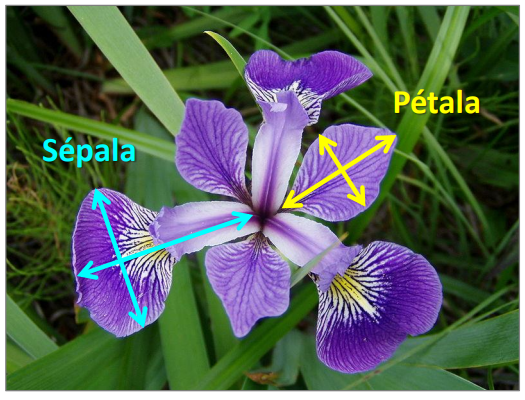

In [ ]:
# DADOS EMPARELHADOS: DIAGRAMA DE DISPERSÃO
# -> Quando cada valor em um conjunto de dados corresponde a um valor em um segundo conjunto de dados, tais conjuntos são chamados de CONJUNTOS DE DADOS EMPARELHADOS
# -> Uma maneira de representar conjunto de dados emparelhados é usando um GRAFICO DE DISPERSÃO, no qual os pares ordenados são representados como pontos em um plano coordenado
# -> Um conjunto de dados QUANTITATIVOS cujos valores são obtidos em intervalos regulares, durante um periodo de tempo, são chamados de SERIE TEMPORAL
# -> Um grafico de SERIE TEMPORAL tem: eixo horizontal (periodo de tempo) e eixo vertical (a grandeza QUANTITATIVA observada)
# ->

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


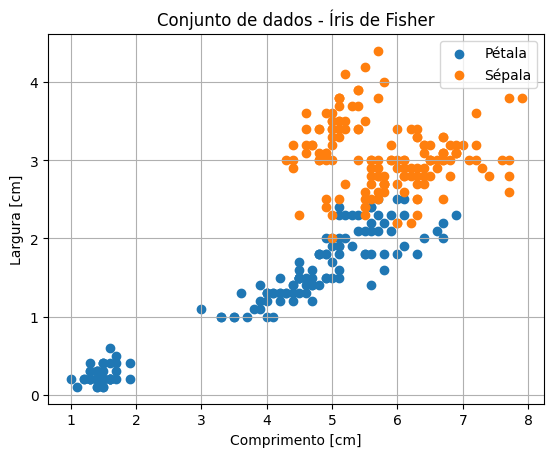

In [ ]:
# Leitura dos dados "externos": módulo de datasets da biblioteca Scikit-learn
from sklearn.datasets import load_iris

# Obtém os dados em objeto da classe 'Bunch' e cria um DataFrame correspondente
Iris_dataset = load_iris()
iris = pd.DataFrame(data=Iris_dataset.data, columns=Iris_dataset.feature_names)
display(iris.head())

# Construção do diagrama de dispersão
plt.scatter(iris['petal length (cm)'], iris['petal width (cm)'])
plt.scatter(iris['sepal length (cm)'], iris['sepal width (cm)'])
plt.xlabel('Comprimento [cm]')
plt.ylabel('Largura [cm]')
plt.title('Conjunto de dados - Íris de Fisher')
plt.legend(['Pétala', 'Sépala'])
plt.grid()
plt.show()

# **TTI109 - Estatística**
# **Aula 04 - Estatística Descritiva 03**

Nessa aula vamos aprender a calcular:

* Medidas de tendêcia central (média, moda e mediana);
* Médias ponderadas;
* Média de uma distribuição de frequências.

# **Conjunto de dados**

A tabela registra uma amostra das alturas de alunos que compõem uma turma.

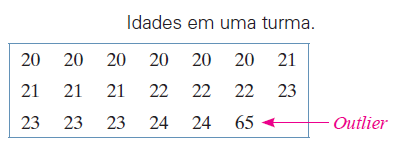

# **Construção do histograma da distribuição**

Nesse diagrama, identificaremos cada classe à uma idade. Então, devemos utilizar o parâmetro `freq=1` no método `interval_range` do `Pandas`.

In [ ]:
import pandas as pd
# Conjunto de dados
data = pd.Series([20, 20, 20, 20, 20, 20, 21,
                  21, 21, 21, 22, 22, 22, 23,
                  23, 23, 23, 24, 24, 65])

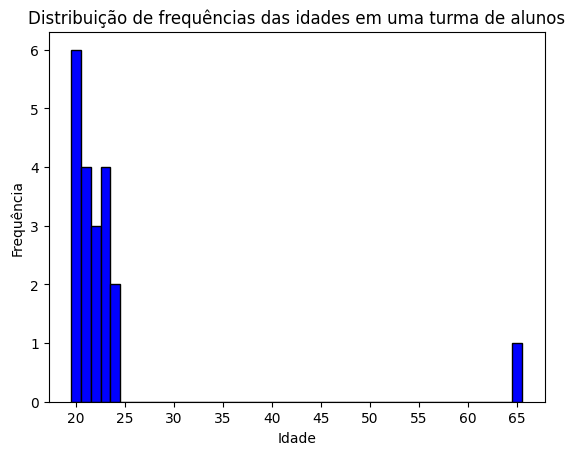

In [ ]:
import matplotlib.pyplot as plt

# Construção do histograma
amp = data.max()-data.min() #'amp' calcula a amplitude dos dados, que é a diferença entre o valor máximo e mínimo nos seus dados.
# a amp pode ser usada para definir os intervalos das classes no histograma.
eixo_x = list(range(data.min(), data.max()+1, 5)) # Atribuindo uma lista que define os pontos de divisão no eixo x do histograma. -> Criando uma lista com intervalos de 5 unidades a partir do valor mínimo dos dados (que é 20) até o valor máximo + 1.
classes = pd.interval_range(start=data.min()-0.5, end=data.max()+0.5, freq=1) #A variável 'classes' está sendo usada para criar intervalos de classes. Cada intervalo representa um agrupamento de dados no histograma.


histograma = data.hist(bins=[classe.left for classe in classes]+[data.max()+0.5],
                       color='blue', edgecolor='black', grid=False)
# Criando o histograma usando os dados da variável 'data'.
# O argumento 'bins' está definido como uma lista que consiste nas fazer a conta para cada bordas esquerdas de cada intervalo de classe (obtidas através de classe.left para cada classe em 'classes')
# acrescentado um valor adicional, que é o valor máximo dos dados + 0.5.
# A cor das barras do histograma é definida como azul ('color='blue''), a cor das bordas das barras é preta ('edgecolor='black''),
# e você está desativando as linhas de grade com 'grid=False'.

# Inserção de atributos ao gráfico
histograma.set(xlabel='Idade', ylabel='Frequência',
               title='Distribuição de frequências das idades em uma turma de alunos',
               xticks=eixo_x)
# aqui esta definindo os rótulos dos eixos x e y, o título do gráfico e os rótulos dos ticks no eixo x usando o método 'set' do objeto do histograma.

plt.show()

# **Medidas de tendência central da distribuição**
O `Pandas Series` tem os métodos `mean` para o cálculo da média e `median` para a mediana. A moda é calculada pelo método `mode`. Aqui, a ressalva é que o retorno desse método é uma nova série, pois a distribuição pode ser multimodal.

In [ ]:

# MEDIDAS DE TENDENCIA CENTRAL DA DISTRIBUIÇÃO
# -> Uma medida de tendencia central é um valor que representa uma observação tipica ou central de um conjunto de dados

# EXEMPLPOS DE MEDIDAS CENTRAL DA DSITRIBUIÇÃO

# MÉDIA de um conjunto de dados: é a soma dos valores dos dados dividida pelo numero de observações.
# - Na media, sempre arredonde uma casa decimal a mais do que o apresentado  no conjunto original de dados
# - Na media, ela pode ser muito afetada por conta dos outliers. Pode dar um valor muito discrepante a média

# OUTLIERS
# - Enquanto alguns outliers são validos outros podem ocorrer po causa de erros no registro de dados
# - Um conjunto de dados pode ter 1 ou mais outliers, causando lacunas de distribuição
# - As conclusões que são tomadas com base em um conjunto de dados que contem outliers podem ser falhas

# MEDIANA de um conjunto de dados é um valor que esta no meio dos dados SOMENTE quando o conjunto esta ordenado.
# e dividinde ele em duas partes com quantidades iguais de VALORES.
# - A mediana indica o centro de um conjunto de dados
# - Se o conjunto de dados for par a mediana é a média dos dois elementos que ocupam as posições centrais
# - Se o conjunto de dados for impar a mediana é o elemento do meio

# MODA de um conjunto de dados (NECESSARIEMENTE ORDENADO) é um valor que ocorre com a MAIOR frequencia.
# - Um conjunto de dados pode ter uma moda, mais de uma moda ou não ter moda .
# - Quando nenhum valor se repete o conjunto não tem moda
# - Quando dois valores ocorrem com a mesma frequencia (por ex, o numero 2 aparece 5 vezes e o numero 8 aparece 5 vezes tbm), cada um é uma moda e o conjunto é chamado de bimodal
# - Exemplo: se o numero 225 em um conjunto de dados se repete com a maior frequencia e somente ele se repete a moda desses numero é 225
# - Exemplo: se o numero 225 e 335 em um conjunto de dados repete 10 vezes o numero 225  10 vezes o numero 335, o conjunto é bimodal.
# - Entretanto se o numero 225 e 335 em um conjunto de dados repete 10 vezes o numero 225  15 vezes o numero 335, a moda é 335.

# A MEDIA LEVA EM CONSIDERAÇÃO TODOS OS VALORES E É AFETADA PELO OUTLIER E A MEDIANA TAMBEM LEVA EM CONSIDERAÇÃO TODOS MAS NÃO É AFETADA PELO OUTLIER

# MÉDIA PONDERADA
# - Uma média ponderada é a media de um conjunto de dados cujos valores tem pesos variados. A media ponderada é dada por:
# MEDIA PONDERADA = (N1 * P1) + (N2 * P2) + (N3 * P3) + ETC ETC ETC / P1 + P2 + P3 + ETC + ETC + ETC

# MEDIA DE UMA DISTRIBUIÇÃO DE FREQUENCIA
# - FORMULA: (PONTO_MEDIO_DA_CLASSE1 * freq_desse_N1) + (PONTO_MEDIO_DA_CLASSE2 * freq_desse_N2) + (PONTO_MEDIO_DA_CLASSE3 * freq_desse_N3) + ETC + ETC + ETC / soma de todas as frequencia (Quantiadade de dados)
# - 1) Determine o ponto medio de cada classe
#      -> (limite_inferior) + (limite superior) / 2
# - 2) Calcule a soma da multiplicação dos pontos medios pelas frequencias
# - 3) Calcule a soma das frequencias (Quantiadade de dados)
# - 4) Determine a media da distribuição de frequencia

# TIPO DE DISTRIBUIÇÕES DE FREQUENCIA
# - SIMETRICA E UNIMOIDAL
#   -> MEDIA, MEDIANA E MODA SÃO IGUAIS
# - ASSIMETRICA Á ESQUERDA
#   -> A MEDIA É MENOR QUE A MEDIANA QUE É GERALMENTE MENOR QUE A MODA (MODA > MEDIANA > MEDIA)
# - ASSIMETRICA Á DIREITA
#   -> A MEDIA É MAIOR QUE A MEDIANA QUE É GERALMENTE MAIOR QUE A MODA (MEDIA > MEDIANA > MODA)





In [ ]:
# Cálculo das medidas de tendência central
media = data.mean() #MEAN CALCULA A MEDIA
print(f'A média da distribuição de idades é {media}.')
mediana = data.median() #MEDIAN CALCULA A MEDIANA
print(f'A mediana da distribuição de idades é {mediana}.')
moda = list(data.mode()) # mode retorna uma série de dados!
print(f'A moda da distribuição de idades é {moda[0]}.')

A média da distribuição de idades é 23.75.
A mediana da distribuição de idades é 21.5.
A moda da distribuição de idades é 20.


# **Média ponderada de uma série de dados**

Você está frequentando uma disciplina na qual sua nota é determinada com base em 5 fontes: 50% da média de seu teste, 15% de sua prova bimestral, 20% de sua prova final, 10% de seu trabalho no laboratório de informática e 5% de seus deveres de casa. Suas notas são: 86 (média do teste), 96 (prova bimestral), 82 (prova final), 98 (laboratório) e 100 (dever de casa). Qual é a média ponderada de suas notas? Se a média mínima para um conceito A é 90, você obteve um A?

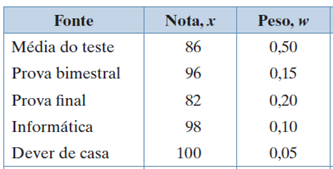

In [ ]:
# Criação do conjunto de dados
notas = pd.DataFrame({'Notas':[86, 96, 82, 98, 100],
                      'Pesos':[0.5, 0.15, 0.2, 0.1, 0.05]})
notas.index = ['Média do teste', 'Prova bimestral', 'Prova final',
               'Informática', 'Dever de casa'] #index coloca os indices do data frame notas
display(notas)

# Cálculo da média ponderada - Usando a definição
media_ponderada = sum(notas['Notas'] * notas['Pesos']) / notas['Pesos'].sum()
print(f'A média final é {media_ponderada}.')

# Cálculo da média ponderada - Usando o numpy
import numpy as np
media_ponderada = np.average(a=notas['Notas'], weights=notas['Pesos'])
print(f'A média final é {media_ponderada}.')

,Notas,Pesos
Média do teste,86,0.50
Prova bimestral,96,0.15
Prova final,82,0.20
Informática,98,0.10
Dever de casa,100,0.05


A média final é 88.6.
A média final é 88.6.


# **Média ponderada por agrupamento de dados**
Vamos examinar um exemplo. Suponha que você fez uma compra de três tipos de produtos: chocolate, sorvete e biscoito. Você adquiriu três itens de cada produto, cada um deles produzido por um fabricante diferente. Assim cada item tem um preço e um "peso líquido" distinto. Qual o preço médio de cada tipo de produto?

In [ ]:
# Criação do conjunto de dados
produtos = pd.DataFrame({'Nome_item': ['Chocolate', 'Chocolate', 'Chocolate',
                                       'Biscoito', 'Biscoito', 'Biscoito',
                                       'Sorvete', 'Sorvete', 'Sorvete'],
                          'Preço': [90, 50, 86, 87, 42, 48, 68, 92, 102],
                          'Peso': [4, 2, 3, 5, 6, 5, 3, 7, 5]})

display(produtos)

# Função para o cálculo da média ponderada de um agrupamento
def media_ponderada(dataframe, col_valores, col_pesos):
    valores = dataframe[col_valores]
    pesos = dataframe[col_pesos]
    return (valores*pesos).sum() / pesos.sum()



# Média ponderada agrupada pelo nome do item
medias = produtos.groupby('Nome_item').apply(media_ponderada, 'Preço', 'Peso')
display(medias)

# Preço méio de cada item
for indice in range(len(medias)):
  print(f'Preço médio do {medias.index[indice]}: {medias[indice]:.2f}')

,Nome_item,Preço,Peso
0,Chocolate,90,4
1,Chocolate,50,2
2,Chocolate,86,3
3,Biscoito,87,5
4,Biscoito,42,6
5,Biscoito,48,5
6,Sorvete,68,3
7,Sorvete,92,7
8,Sorvete,102,5


Nome_item
Biscoito     57.937500
Chocolate    79.777778
Sorvete      90.533333
dtype: float64

Preço médio do Biscoito: 57.94
Preço médio do Chocolate: 79.78
Preço médio do Sorvete: 90.53


# **Média de uma distribuição de frequência**
Voltemos ao exemplo da distribuição de frequência dos preços de navegadores GPS. Qual o preço médio de um navegador?

In [ ]:
from math import ceil
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])

# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7

# Distribuição de frequência
dist = data.value_counts(bins=7).sort_index() #pega e bota na tabela o que eu colocar dist

# Reconfiguração do conjunto de dados: Series para DataFrame
dist = pd.DataFrame(dist)
dist = dist.reset_index()
dist.columns = ['Classe', 'Frequência']

# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)

# Atribuição dos intervalos para a coluna Classe
dist['Classe'] = intervalos #atribui na tabela os intervalos na nova coluina classe

# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos] #calcula o ponto medio das classes

# Inserção da coluna Pontos médios
dist['Pontos médios'] = pts_medios #atribui na tabela os pts_medios das classes na nova coluina pontos medios
display(dist)

# Cálculo da preço médio
obs = len(data)
preco = (dist['Frequência']*dist['Pontos médios']).sum()/obs #calcula a media da distribuição de freuencia
print(f'O preço médio de um navegador GPS é de US${preco:.2f}.')

,Classe,Frequência,Pontos médios
0,"(65, 105]",6,85.0
1,"(105, 145]",9,125.0
2,"(145, 185]",6,165.0
3,"(185, 225]",4,205.0
4,"(225, 265]",2,245.0
5,"(265, 305]",1,285.0
6,"(305, 345]",2,325.0


O preço médio de um navegador GPS é de US$162.33.


# **TTI109 - Estatística**
# **Aula 05 - Estatística Descritiva 04**

Nessa aula vamos aprender a calcular:

* Medidas de dispersão (variância e desvio padrão);
* Dispersão em dados agrupados;
* Coeficiente de variação.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MEDIDAS DE VARIAÇÃO
# Uma medida de variação é um valor que representa a dispersão de um conjunto de dados
# DESVIO PADRAO POPULACIONAL ; DESVIO PADRAO AMOSTRAL

# -> AMPLITUDE
# A amplitude de um conjunto de dados é a diferença entre os valores maximo e minimo dos dados

# -> DESVIO
# O DESVIO de um valor x em uma população é a difereça entre o valor x e a MÉDIA (REPRESENTADA POR u) u do conjunto de dados -> Desvio de x = x - u -> VALOR X ANALISADO - MEDIA = DESVIO
# A soma dos desvios para qualquer conjunto de dados é igual a 0, por isso não faz sentido encontrar a media dos desvios
# Sendo assim, calcula-se a soma dos quadrados dos desvios, SSx -> Em uma população a media dos quadrados dos desvios é a VARIANCIA POPULACIONAL

# -> VARIANCIA POPULACIONAL (REPRESENTADO POR SIGMA AO QUADRADO => SIGMA**2)
# Em uma população a variancia populacional é a MEDIA DOS QUADRADOS DOS DESVIOS
# A SOMA DOS QUADRADOS DOS DESVIOS É REPRESENTADO POR SSx
# A variancia populacional de um conjunto de dados com N elementos é <-> (com x sendo o valor individual no conjunto de dados )
# <-> (x1 - media do conjunto de dados)**2 + (x1 - media do conjunto de dados)**2 + (x1 - media do conjunto de dados)**2 + etc / N
# Desvantagem a unidade de medida de variancia é diferente da unidade de medida do conjunto de dados


# -> DESVIO PADRÃO POPULACIONAL (DESVIO PADRAO PARA UMA POPULAÇÃO) (REPRESENTADO POR SIGMA => SIGMA)
# É a RAIZ QUADRADA da variancia populacional

# -> OBSERVACOES DESVIO PADRAO
# Mede a variaçao dos elementos com relação a media
# É sempre maior ou igual a 0 -> Quando o DESVIO PADRÃO POPULACIONAL  é igual a 0 o conjunto de dados não apresenta variação (todos os elementos tem o mesmo valor)
# A medida que os valores se afastam da media (isto é, estao mais dispersos entre eles mesmos) o valor do DESVIO PADRÃO POPULACIONAL  padrao aumenta
# Quanto mais distante da media (isto é, estao mais dispersos entre eles mesmos), maior é o desvio padrao populacional

# -> VARIANCIA AMOSTRAL (S**2)
# A SOMA DOS QUADRADOS DOS DESVIOS É REPRESNETADO POR SSx
# Para calcular a VARIANCIA AMOSTRAL: S**2 = (x1 - media do conjunto de dados)**2 + (x2 - media do conjunto de dados)**2 + (x3 - media do conjunto de dados)**2 + etc / N (numero de de elementos) - 1
# Para calcular a VARIANCIA AMOSTRAL: Σ (valor individual no conjunto de dados - a media do conjunto de dados)**2 / o tamanho da amostra - 1


# -> DESVIO PADRÃO AMOSTRAL (S)
# Para calcular o DESVIO PADRÃO AMOSTRAL: É a RAIZ QUADRADA da variancia amostral

# INTERPRETANDO O DESVIO PADRAO POPULACIONAL / AMOSTRAL
# O desvio padrao de uma população / amostra é uma medida que indica o quanto, em média, os valores se desviam da média desse conjunto.
# Quanto mais espalhados estiverem os dados no grafico, maior o desvio padrão
# Podemos usar o desvio padrão para comparar a variação em conjuntos de dados que tem a mesma unidade de medida e médias aproximadamente iguais

# -> VALORES INCOMUNS E MUITO INCOMUNS
# Dados que se encontram a mais ou menos dois desvios padrão da média são considerados incomuns
# Dados que se encontram a mais de tres desvios padrao da media são muito incomuns
# Dados incomuns e muito incomuns tem uma influencia maior no desvio padrão do que aqueles que estão mais proximos da media

# -> INTERPRETANDO O DESVIO PADRAO POPULACIONAL / AMOSTRAL PARA CONJUNTO DE DADOS EM FORMA DE UM SINO
# Muitos conjuntos de dados na vida real tem distribuições que são simetricas em forma de sino
# Cerca de 68% dos dados encontram-se no intervalo de +1 a -1 desvio amostral em relação a media
# Cerca de 95% dos dados encontram-se no intervalo de +2 a -2 desvio amostral em relação a media
# Cerca de 99,7% dos dados encontram-se no intervalo de +3 a -3 desvio amostral em relação a media

# -> DESVIO PADRAO PARA DADOS AGRUPADOS E MÉDIA AMOSTRAL
# Σ (valor individual no conjunto de dados - MÉDIA AMOSTRAL)**2 * freq / o tamanho da amostra - 1 -> DESVIO PADRAO AMOSTRAL PARA DADOS AGRUPADOS
# Σ (valor individual no conjunto de dados * freq individual ) / o tamanho da amostra -> MÉDIA AMOSTRAL

# -> COEFICIENTE DE VARIAÇÃO
# Para comparar conjuntos de dados com unidades de medida difernetes ou médias diferentes, usa-se o coefciente de variação
# Ele mede a variação de um conjunto de dados com relação a média
# Para população: CV =  DESVIO PADRÃO POPULACIONAL / MEDIA * 100%
# Para amostra: CV =  DESVIO PADRÃO AMOSTRAL / MEDIA * 100%
# Quanto maior o coeficiente de variação mais disperso são os dados



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# MEDIDAS DE VARIAÇÃO
# Uma medida de variação é um valor que representa a dispersão de um conjunto de dados
# DESVIO PADRAO POPULACIONAL ; DESVIO PADRAO AMOSTRAL

# -> AMPLITUDE
# A amplitude de um conjunto de dados é a diferença entre os valores maximo e minimo dos dados

# -> DESVIO
# O DESVIO de um valor x em uma população é a difereça entre o valor x e a MÉDIA (REPRESENTADA POR u) u do conjunto de dados -> Desvio de x = x - u -> VALOR X ANALISADO - MEDIA = DESVIO
# A soma dos desvios para qualquer conjunto de dados é igual a 0, por isso não faz sentido encontrar a media dos desvios
# Sendo assim, calcula-se a soma dos quadrados dos desvios, SSx -> Em uma população a media dos quadrados dos desvios é a VARIANCIA POPULACIONAL

# -> VARIANCIA POPULACIONAL (REPRESENTADO POR SIGMA AO QUADRADO => SIGMA**2)
# Em uma população a variancia populacional é a MEDIA DOS QUADRADOS DOS DESVIOS
# A SOMA DOS QUADRADOS DOS DESVIOS É REPRESENTADO POR SSx
# A variancia populacional de um conjunto de dados com N elementos é <-> (com x sendo o valor individual no conjunto de dados )
# <-> (x1 - media do conjunto de dados)**2 + (x1 - media do conjunto de dados)**2 + (x1 - media do conjunto de dados)**2 + etc / N
# Desvantagem a unidade de medida de variancia é diferente da unidade de medida do conjunto de dados


# -> DESVIO PADRÃO POPULACIONAL (DESVIO PADRAO PARA UMA POPULAÇÃO) (REPRESENTADO POR SIGMA => SIGMA)
# É a RAIZ QUADRADA da variancia populacional

# -> OBSERVACOES DESVIO PADRAO
# Mede a variaçao dos elementos com relação a media
# É sempre maior ou igual a 0 -> Quando o DESVIO PADRÃO POPULACIONAL  é igual a 0 o conjunto de dados não apresenta variação (todos os elementos tem o mesmo valor)
# A medida que os valores se afastam da media (isto é, estao mais dispersos entre eles mesmos) o valor do DESVIO PADRÃO POPULACIONAL  padrao aumenta
# Quanto mais distante da media (isto é, estao mais dispersos entre eles mesmos), maior é o desvio padrao populacional

# -> VARIANCIA AMOSTRAL (S**2)
# A SOMA DOS QUADRADOS DOS DESVIOS É REPRESNETADO POR SSx
# Para calcular a VARIANCIA AMOSTRAL: S**2 = (x1 - media do conjunto de dados)**2 + (x2 - media do conjunto de dados)**2 + (x3 - media do conjunto de dados)**2 + etc / N (numero de de elementos) - 1
# Para calcular a VARIANCIA AMOSTRAL: Σ (valor individual no conjunto de dados - a media do conjunto de dados)**2 / o tamanho da amostra - 1


# -> DESVIO PADRÃO AMOSTRAL (S)
# Para calcular o DESVIO PADRÃO AMOSTRAL: É a RAIZ QUADRADA da variancia amostral

# INTERPRETANDO O DESVIO PADRAO POPULACIONAL / AMOSTRAL
# O desvio padrao de uma população / amostra é uma medida que indica o quanto, em média, os valores se desviam da média desse conjunto.
# Quanto mais espalhados estiverem os dados no grafico, maior o desvio padrão
# Podemos usar o desvio padrão para comparar a variação em conjuntos de dados que tem a mesma unidade de medida e médias aproximadamente iguais

# -> VALORES INCOMUNS E MUITO INCOMUNS
# Dados que se encontram a mais ou menos dois desvios padrão da média são considerados incomuns
# Dados que se encontram a mais de tres desvios padrao da media são muito incomuns
# Dados incomuns e muito incomuns tem uma influencia maior no desvio padrão do que aqueles que estão mais proximos da media

# -> INTERPRETANDO O DESVIO PADRAO POPULACIONAL / AMOSTRAL PARA CONJUNTO DE DADOS EM FORMA DE UM SINO
# Muitos conjuntos de dados na vida real tem distribuições que são simetricas em forma de sino
# Cerca de 68% dos dados encontram-se no intervalo de +1 a -1 desvio amostral em relação a media
# Cerca de 95% dos dados encontram-se no intervalo de +2 a -2 desvio amostral em relação a media
# Cerca de 99,7% dos dados encontram-se no intervalo de +3 a -3 desvio amostral em relação a media

# -> DESVIO PADRAO PARA DADOS AGRUPADOS E MÉDIA AMOSTRAL
# Σ (valor individual no conjunto de dados - MÉDIA AMOSTRAL)**2 * freq / o tamanho da amostra - 1 -> DESVIO PADRAO AMOSTRAL PARA DADOS AGRUPADOS
# Σ (valor individual no conjunto de dados * freq individual ) / o tamanho da amostra -> MÉDIA AMOSTRAL

# -> COEFICIENTE DE VARIAÇÃO
# Para comparar conjuntos de dados com unidades de medida difernetes ou médias diferentes, usa-se o coefciente de variação
# Ele mede a variação de um conjunto de dados com relação a média
# Para população: CV =  DESVIO PADRÃO POPULACIONAL / MEDIA * 100%
# Para amostra: CV =  DESVIO PADRÃO AMOSTRAL / MEDIA * 100%
# Quanto maior o coeficiente de variação mais disperso são os dados



# Conjunto de dados - Notas obtidas em três provas
Neste exercício, trabalharemos com o conjunto de notas obtidas por uma turma de doze alunos em três provas realizadas ao longo de um semestre letivo.

In [ ]:
import pandas as pd
import numpy as np

# Conjunto de dados
tabela = pd.DataFrame({'Aluno':['Alisa','Bobby','Cathrine','Madonna',
                              'Rocky','Sebastian','Jaqueline','Rahul',
                              'David','Andrew','Ajay','Teresa'],
                      'P1':[62,47,55,74,31,77,85,63,42,32,71,57],
                      'P2':[89,87,67,55,47,72,76,79,44,92,99,69],
                      'P3':[56,86,77,45,73,62,74,89,71,67,97,68]})
display(tabela)

,Aluno,P1,P2,P3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqueline,85,76,74
7,Rahul,63,79,89
8,David,42,44,71
9,Andrew,32,92,67


Quais as amplitudes, as médias, as medianas e os desvios padrão de cada prova? Qual das provas obteve a distribuição mais homogênea de notas?

In [ ]:
# Construindo um novo DataFrame, coluna a coluna
''' A atribuição True ao parâmetro numeric_only garante que apenas colunas
numéricas sejam utilizadas. Para o cálculo do desvio padrão, é preciso usar
ddof=0 para informar que os dados são proveninetes de uma população (o valor
default, ddof=1, é usado para o desvio padrão amostral.'''
est_provas =pd.DataFrame(tabela.mean(axis=0, numeric_only=True), columns=['Média'])
est_provas['Mediana'] = tabela.median(axis=0, numeric_only=True)
est_provas['DesvPad'] = tabela.std(axis=0, ddof=0, numeric_only=True)
amps = [tabela['P'+str(i)].max() - tabela['P'+str(i)].min() for i in range(1,4)]
est_provas['Amplitudes'] = amps
display(est_provas)

# Distribuição mais homogênea
print('*** Prova mais homogênea ***')
homogenea = est_provas.loc[est_provas['DesvPad'] == est_provas['DesvPad'].min()]
display(homogenea)

# Usando o método agg (nesse caso, o método std é usado com ddof=1)
print('Uso do método agg')
tabela.agg(['mean', 'std', 'median'])

,Média,Mediana,DesvPad,Amplitudes
P1,58.000000,59.5,16.703293,54
P2,73.000000,74.0,16.901676,55
P3,72.083333,72.0,13.744443,52


*** Prova mais homogênea ***


,Média,Mediana,DesvPad,Amplitudes
P3,72.083333,72.0,13.744443,52


Uso do método agg


,P1,P2,P3
mean,58.000000,73.000000,72.083333
std,17.446021,17.653225,14.355603
median,59.500000,74.000000,72.000000


Quais as médias e desvios padrão para a distribuição de provas de cada aluno? Qual o melhor aluno? Qual o mais consistente?

In [ ]:
# Médias de desvios padrão por aluno
''' É preciso usar axis=1 para o cálculo nas linhas do DataFrame.
CUIDADO: o retorno é um objeto Series, logo é preciso usasar list() para
armazenar em uma coluna de um DataFrame.'''
est_alunos = pd.DataFrame(tabela.mean(axis=1, numeric_only=True), columns=['Média'])
est_alunos.index = list(tabela['Aluno'])
est_alunos['DesvPad'] = list(tabela.std(axis=1, ddof=0, numeric_only=True))
display(est_alunos)

# Encontrando o melhor aluno
print('*** Melhor Aluno ***')
melhor = est_alunos.loc[est_alunos['Média'] == est_alunos['Média'].max()]
display(melhor)

# Encontrando o aluno mais consistente
print('*** Aluno mais consistente ***')
consistente = est_alunos.loc[est_alunos['DesvPad'] == est_alunos['DesvPad'].min()]
display(consistente)

# Média e desvio padrão de dados agrupados
**Horas semanais de estudo:** A distribuição do número
de horas semanais de estudo de uma amostra de estudantes universitários é mostrada no gráfico de pizza.
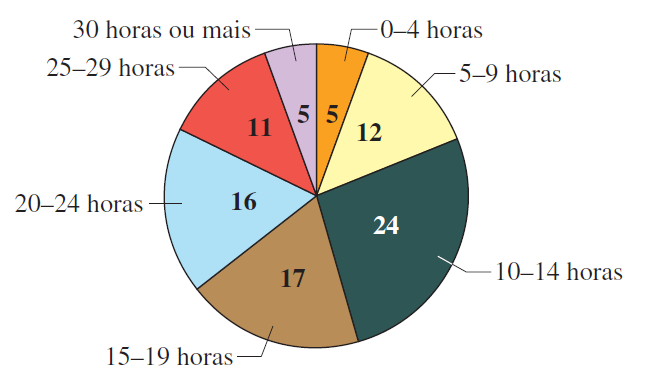

Construa uma distribuição de frequência para
os dados. A seguir, use a tabela para estimar a média e o desvio padrão amostral do conjunto de dados. Para isso, use 32 como o ponto médio para “30 horas ou mais".

In [ ]:
# Colunas iniciais da distribuição de frequência
dados = pd.DataFrame({'Classe': ['0-4', '5-9', '10-14', '15-19',
                                 '20-24', '25-29', '30 ou +'],
                      'Freq (f)': [5, 12, 24, 17, 16, 11, 5],
                      'Pt. médio (x)':[2, 7, 12, 17, 22, 27, 32]})
# Coluna valor * frequência
dados['x*f'] = dados['Freq (f)']*dados['Pt. médio (x)']
# Cálculo da média
media_dados = dados['Pt. médio (x)'].mean()
# Coluna valor - média
dados['x-xbarra'] = dados['Pt. médio (x)'] - media_dados
# Coluna (valor - média)^2
dados['(x-xbarra)^2'] = dados['x-xbarra']**2
# Coluna (valor - média)^2 * frequência
dados['(x-xbarra)^2*f'] = dados['(x-xbarra)^2']*dados['Freq (f)']
display(dados)
# Cálculo da média amostral
obs = dados['Freq (f)'].sum()
media_am = dados['x*f'].sum()/obs
print(f'Média amostral: {media_am:.1f} horas')
# Cálculo do desvio padrão amostral
desv_pam_am = (dados['(x-xbarra)^2*f'].sum()/(obs-1))**(1/2)
print(f'Desvio padrão amostral: {desv_pam_am:.1f} horas')

# Comparando dois conjuntos de dados
**Salários anuais:** Foi obtida uma amostra dos salários anuais (em milhares de dólares) para contadores recém-formados em Dallas e Nova York. Calcule o coeficiente de variação para cada
os salários de cada cidade e compare os resultados.

In [ ]:
# Conjunto de dados
salarios = pd.DataFrame({'Dallas': [41.6, 50.0, 49.5, 38.7, 39.9,
                                    45.8, 44.7, 47.8, 40.5, 44.3],
                         'New York': [45.6, 41.5, 57.6, 55.1, 59.3,
                                      59.0, 50.6, 47.2, 42.3, 51.0]})
display(salarios)

# Cálculo das médias, desvios padrão e coeficiente de variação
est_sal =pd.DataFrame(salarios.mean(axis=0, numeric_only=True), columns=['Média'])
est_sal['DesvPad'] = salarios.std(axis=0, ddof=0, numeric_only=True)
est_sal['CV'] = est_sal['DesvPad']/est_sal['Média']*100
display(est_sal)

# **TTI109 - Estatística**
# **Aula 06 - Estatística Descritiva 04**

Nessa aula vamos aprender a calcular:

* Medidas de dispersão (variância e desvio padrão);
* Dispersão em dados agrupados;
* Coeficiente de variação.

In [ ]:
'''
Medidas de posição
(em todas as circuntstancias o conjunto de dados tem que estar ORDENADO)

**** Separatrizes
-> Separatrizes são numero que partilham, ou dividem, um conjunto de dados ordenado em partes iguais (com o mesmo numero de elementos)
-> A mediana é uma separatriz porque divide um conjunto de dados ordenado em duas partes com quantides iguais de elementos
-> TIPOS DE SEPARATRIZES: QUARTIS, DECIS, PERCENTIS

  **** Quartis
    -> Os tres quartis Q1, Q2 e Q3 dividem um conjunto de dados ordenado em quatro partes iguais.
    -> 1/4 dos dados recai sobre ou abaixo do primeiro quartil Q1
    -> metade dos dados recai sobre ou abaixo do segundo quartil Q2 (O segundo quartil recai na mediana do conjunto de dados)
    -> 3/4 dos dados recaem sobre ou abaixo do terceiro quartil Q3

    -> COMO ENCONTRAR OS QUARTIS
      * Ordene o conjunto de dados e encontre a mediana Q2
      * O primeiro quartil, Q1, é a mediana dos valores a esquerda de Q2 (EXCLUINDO A PROPRIA MEDIANA PARA ACHAR A MEDIANA A ESQUEDA DE Q2)
      * O terceiro quartil, Q3, é a mediana dos valores a direita de Q2 (EXCLUINDO A PROPRIA MEDIANA PARA ACHAR A MEDIANA A DIREITA DE Q2)

    *** Mediana
    -> A mediana (no segundo quartil) é uma medida de TENDENCIA CENTRAL baseada na POSIÇÃO.
    -> A medida de variação que é baseada na POSIÇÃO é a AMPLITUDE INTERQUARTIL (AIQ),
    -> A AMPLITUDE INTERQUARTIL INDICA A DISPERSÇAO DOS 50% CENTRAIS
    -> A amplitude interquartil de um conjunto de dados é uma medida de varição que fornece a amplitude da porção central (aproximadamente metade dos dados)
    -> A amplitude interquartil mostra o quanto os dados variam na porção central de dados
    -> A amplitude interquartil é a diferença entre o terceiro e o primeiro quartil => AIQ = Q3 - Q1
    -> LEMBRE-SE: Um outlier esta muito distante dos demais valores do conjunto de dados. Uma forma de identificar outliers é usar a amplitude interquartil

    *** COMO IDENTIFICAR A AMPLITUDE INTERQUARTIL PARA IDENTEFICAR OUTLIERS
    -> 1) Encontre o Q2: Q2 é a mediana de todo o conjunto de dados ordenado
    -> 2) Encontre o primeiro (Q1) e o terceiro (Q3) quartis do conjunto de dados
    -> 3) Encontre a AIQ: AIQ = Q3 - Q1
    -> 4) Multiplique a AIQ por 1,5: 1,5 * AIQ
    -> 5) Subtraia 1,5 de Q1. Qualquer valor menor que Q1 - (1,5 * AIQ) é um outlier (se der neg, não se aplica)
    -> 6) Adicione 1,5 a Q3. Qualquer valor maior que Q3 + (1,5 * AIQ) é um outlier (se der neg, não se aplica)

    *** APLICAÇÃO DOS QUARTIS
    -> Representar conjuntos de dados usando diagramas de caixa-e-bigode ou boxplots
    -> Um diagrama boxplot é uma ferramenta de analise exploratoria que destaca caracteristicas importantes de um conjunto de dados

    -> DESENHANDO UM BOXPLOT
      * 1) Determine o resumo dos cinco numeros do conjunto de dados
          - 1: O valor minimo
          - 2: O primeiro quartil Q1
          - 3: A mediana Q2
          - 4: O terceiro quartil Q3
          - 5: O valor maximo
      * 2) Construa uma escala horizontal que se estenda sobre a amplitude dos dados
      * 3) Represente os cinco numeros numa escala horizontal
      * 4) Desenhe uma caixa em cima da escala horizontal de Q1 a Q3 e desenhe uma linha vertical na caixa, em Q2
      * 5) Desenhe os bigodes da caixa para os valores minimo e maximo
      * 6) 50% DOS DADOS ESTAO DENTRO DA CAIXA E 25% DOS DADOS NO BIGODE DIREITO E 25% NO LADO ESQUERDO

  **** Resumo
    -> Quartis
      * Divide um conjunto de dados em 4 partes iguais (Q1, Q2, Q3)
    -> Decis
      * Divide um conjunto de dados em 10 partes iguais (D1, D2, D3, .... D9)
    -> Percentis
      * Divide um conjunto de dados em 100 partes iguais (P1, P2, P3, P4, P5, P6, .... P99)

    -> Para encontrar o percentil que corresponde a um valor especifico x
      * Percentil de x = (numero de elementos menores que x / numero total de elementos) * 100 -> Arredonde o resultado para o numero inteiro mais proximo
      * O resultado é a porcentagem que aquele valor especifico representa na analise que esta sendo feita

    *** ESCORE PADRAO OU ESCORE-Z
    -> Representa o numero de desvios padrao em que um valor x encontra-se a partir da media u.
    -> Para calcular o escore-z para um valor: z = (valor x - media) / desvio padrao
    -> Se z < 0 <=> x < u
    -> Se z < 0 <=> x > u
    -> Se z = 0 <=> x = u
    -> Um escore-z pode ser usado para identificar valores incomuns de um conjunto de dados que seja aproximadamente em formato de sino
       Cerca de 68% dos dados encontram-se no intervalo de +1 a -1 desvios amostrais  em relação a media -> onde estao os escores comuns -> dados que estao nessa area sao comuns
       Cerca de 95% dos dados encontram-se no intervalo de +2 a -2 desvios amostrais em relação a media -> onde estao os escores incomuns ->  dados que estao nessa area sao incomuns
       Cerca de 99,7% dos dados encontram-se no intervalo de +3 a -3 desvios amostrais em relação a media -> onde estao os escores muito incomuns ->  dados que estao nessa area sao muito incomuns



# Análise dos quartis de uma série de dados
Para o conjunto de dados a seguir:

*   Determine os quartis
*   Calcule a amplitude interquartil
*   Identifique quaisquer outliers

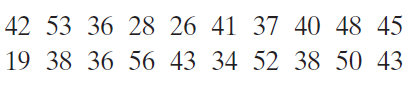

In [ ]:
import pandas as pd
# Conjunto de dados
dados = pd.Series([42, 53, 36, 28, 26, 41, 37, 40, 48, 45,
                   19, 38, 36, 56, 43, 34, 52, 38, 50, 43])
# Determinação dos três quartis
quartis = dados.quantile([0.25, 0.5, 0.75], interpolation='linear')
print('Quartis em um Panda Series:')
display(quartis) # É um objeto panda Series
# Mostrando os quartis ao usuário
print('Desmembrando os quartis:')
lquartis = list(quartis)
for i in range(len(lquartis)):
  print(f'Q{str(i+1)} = {lquartis[i]}')
# Calculando a amplitude interquartil
interquartil = quartis[0.75] - quartis[0.25]
print(f'Amplitude interquartil: {interquartil}')
# Limites para detecção de outliers
lim_min = quartis[0.25] - 1.5*interquartil
lim_max = quartis[0.75] + 1.5*interquartil
print('Limites de detecção para outliers:')
print(f'Inferior = {lim_min}')
print(f'Superior = {lim_max}')
# Procurando por outliers
out_inf = dados.loc[dados <= lim_min]
print('Outlier inferior:')
display(out_inf)
out_sup = dados.loc[dados >= lim_max]
print('Outlier superior:')
display(out_sup)

Quartis em um Panda Series:


0.25    36.00
0.50    40.50
0.75    45.75
dtype: float64

Desmembrando os quartis:
Q1 = 36.0
Q2 = 40.5
Q3 = 45.75
Amplitude interquartil: 9.75
Limites de detecção para outliers:
Inferior = 21.375
Superior = 60.375
Outlier inferior:


10    19
dtype: int64

Outlier superior:


Series([], dtype: int64)

# Customizando as separatrizes
É possível customizar as separatrizes usando o método quantile(). Basta passar uma lista com os percentis desejados.

In [ ]:
# Determinação dos percentis customizados
percentis = dados.quantile([0.1, 0.35, 0.68, 0.95], interpolation='linear')
print('Percentis em um Panda Series:')
display(percentis) # É um objeto panda Series

Percentis em um Panda Series:


0.10    27.80
0.35    37.65
0.68    43.00
0.95    53.15
dtype: float64

# Análise exploratória inicial
O Pandas permite uma análise exploratória simplificada por meio do método describe().

In [ ]:
# Análise exploratória
dados.describe()

count    20.000000
mean     40.250000
std       9.306902
min      19.000000
25%      36.000000
50%      40.500000
75%      45.750000
max      56.000000
dtype: float64

# Análise dos quartis de um painel de dados
O estudo realizado nas séries pode ser facilmente estendido para o caso de painéis de dados.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Importação do conjunto de dados
gorjetas = pd.read_csv("tips.csv")
print('5 primeiras linhas do conjunto de dados:')
display(gorjetas.head())
# Determinação dos quartis
quartis = gorjetas.quantile([0.25, 0.5, 0.75], axis=0,
                            interpolation='linear', numeric_only=True)
print('Tabela com os quartis para cada coluna numérica:')
display(quartis)
# Percentis customizados
percentis = gorjetas.quantile([0.1, 0.3, 0.8], axis=0,
                              interpolation='linear', numeric_only=True)
print('Tabela com percentis customizados:')
display(percentis)
# Análise exploratória inicial
print('Análise exploraória:')
gorjetas.describe()

5 primeiras linhas do conjunto de dados:


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Tabela com os quartis para cada coluna numérica:


,total_bill,tip,size
0.25,13.3475,2.0000,2.0
0.50,17.7950,2.9000,2.0
0.75,24.1275,3.5625,3.0


Tabela com percentis customizados:


,total_bill,tip,size
0.1,10.340,1.5,2.0
0.3,14.249,2.0,2.0
0.8,26.098,4.0,3.0


Análise exploraória:


,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Boxplot - Série de dados
De volta ao conjunto de dados tratado no início desse notebook:

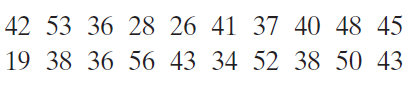

Text(0.5, 1.0, 'Distribuição dos dados')

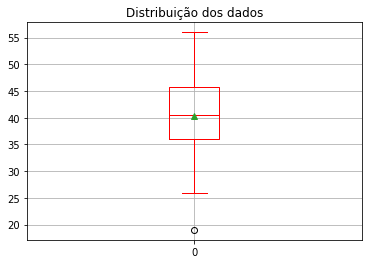

In [ ]:
# É preciso transformar o Pandas Series em um Pandas DataFrame
# Não há o método boxplot para Pandas Series
df = pd.DataFrame(dados)
df.boxplot(color = 'red', vert=True, whis=1.5, showmeans=True)
plt.title('Distribuição dos dados')

# Calculando escores-z


In [ ]:
import scipy.stats as stats
# Criando o conjunto de dados
dados = pd.DataFrame({'Nome': ['Nik', 'Kate', 'Joe', 'Mitch', 'Alana'],
                      'Idade': [32, 30, 67, 34, 20],
                      'Renda': [80000, 90000, 45000, 23000, 12000]})
print('Tabela original:')
display(dados)
# Calculando os escores-z das colunas numéricas
tabela_z = dados.select_dtypes(include='number').apply(stats.zscore)
print('Tabela com colunas substituídas pelos escores-z:')
display(tabela_z)
# Agregando novas colunas com os escores-z
dados['Escore-z Idade'] = stats.zscore(dados['Idade'])
dados['Escore-z Renda'] = stats.zscore(dados['Renda'])
print('Tabela orignal + escores-z:')
display(dados)

Tabela original:


,Nome,Idade,Renda
0,Nik,32,80000
1,Kate,30,90000
2,Joe,67,45000
3,Mitch,34,23000
4,Alana,20,12000


Tabela com colunas substituídas pelos escores-z:


,Idade,Renda
0,-0.288493,0.978700
1,-0.413925,1.304934
2,1.906565,-0.163117
3,-0.163061,-0.880830
4,-1.041085,-1.239687


Tabela orignal + escores-z:


,Nome,Idade,Renda,Escore-z Idade,Escore-z Renda
0,Nik,32,80000,-0.288493,0.978700
1,Kate,30,90000,-0.413925,1.304934
2,Joe,67,45000,1.906565,-0.163117
3,Mitch,34,23000,-0.163061,-0.880830
4,Alana,20,12000,-1.041085,-1.239687


# **TTI109 - Estatística**
# **Aula 07 - Probabilidade**

Nessa aula vamos aprender a calcular:

* Medidas de dispersão (variância e desvio padrão);
* Dispersão em dados agrupados;
* Coeficiente de variação.

In [ ]:
""""

""""

# Identificando espaços amostrais: A moeda e o dado
Descreva o espaço amostral de um experimento probabilístico que consiste do lançamento de uma moeda seguido do lançamento de um dado de seis faces.

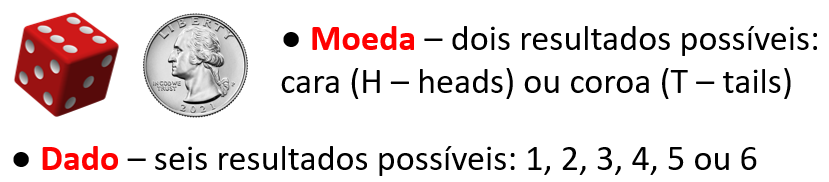

In [ ]:
import itertools
# Resultados para o lançamento da moeda e do dado
moeda = ['Cara', 'Coroa']
dado = ['1', '2', '3', '4', '5', '6']
# Criação do espaço amostral
omega = [resultado for resultado in itertools.product(moeda, dado)]
# Visualização dos elementos do espaço amostral
print('** Espaço amostral **')
for resultado in omega:
  print(resultado)
# Número de elementos no espaço amostral
n_omega = len(omega)
print(f'\nExistem {n_omega} elementos no espaço amostral.')

** Espaço amostral **
('Cara', '1')
('Cara', '2')
('Cara', '3')
('Cara', '4')
('Cara', '5')
('Cara', '6')
('Coroa', '1')
('Coroa', '2')
('Coroa', '3')
('Coroa', '4')
('Coroa', '5')
('Coroa', '6')

Existem 12 elementos no espaço amostral.


# Identificando espaços amostrais: a compra do carro novo
Você está comprando um carro novo. Os fabricantes possíveis, tamanhos dos carros e as cores estão listados a seguir:


* Fabricantes: Ford, GM, Honda
* Tamanhos: compacto, médio
* Cores: branco, vermelho, preto e verde

Descreva o espaço amostral que compreende todas as possíveis escolhas de compra.



In [ ]:
# Listas de opções por atributo
fabricantes = ['Ford', 'GM', 'Honda']
tamanhos = ['Compacto', 'Médio']
cores = ['Branco', 'Vermelho', 'Preto', 'Verde']
# Criação do espaço amostral
esp_amostral = [resultado for resultado in itertools.product(fabricantes, tamanhos, cores)]
# Visualização dos elementos do espaço amostral
print('** Espaço amostral **')
for resultado in esp_amostral:
  print(resultado)
# Número de elementos no espaço amostral
elementos = len(esp_amostral)
print(f'\nExistem {elementos} elementos no espaço amostral.')

** Espaço amostral **
('Ford', 'Compacto', 'Branco')
('Ford', 'Compacto', 'Vermelho')
('Ford', 'Compacto', 'Preto')
('Ford', 'Compacto', 'Verde')
('Ford', 'Médio', 'Branco')
('Ford', 'Médio', 'Vermelho')
('Ford', 'Médio', 'Preto')
('Ford', 'Médio', 'Verde')
('GM', 'Compacto', 'Branco')
('GM', 'Compacto', 'Vermelho')
('GM', 'Compacto', 'Preto')
('GM', 'Compacto', 'Verde')
('GM', 'Médio', 'Branco')
('GM', 'Médio', 'Vermelho')
('GM', 'Médio', 'Preto')
('GM', 'Médio', 'Verde')
('Honda', 'Compacto', 'Branco')
('Honda', 'Compacto', 'Vermelho')
('Honda', 'Compacto', 'Preto')
('Honda', 'Compacto', 'Verde')
('Honda', 'Médio', 'Branco')
('Honda', 'Médio', 'Vermelho')
('Honda', 'Médio', 'Preto')
('Honda', 'Médio', 'Verde')

Existem 24 elementos no espaço amostral.


# Cálculo de probabilidades clássicas: o carro novo
Calcule a probabilidade de que sue carro novo seja:


*   Do fabricante Ford
*   Da cor verde
*   Um compacto
*   Um compacto Honda
*   Um GM vermelho



In [ ]:
# Probabilidade de que o carro novo seja um Ford
evento_1 = [escolha for escolha in esp_amostral if 'Ford' in escolha]
print('** Evento 1: Carro novo é um Ford **')
for resultado in evento_1:
  print(resultado)
prob_1 = len(evento_1)/len(esp_amostral)
print(f'Probabilidade do evento 1 = {prob_1*100:.2f}%\n')
# Probabilidade de que o carro novo seja da cor verde
evento_2 = [escolha for escolha in esp_amostral if 'Verde' in escolha]
print('** Evento 2: Carro novo é da cor verde **')
for resultado in evento_2:
  print(resultado)
prob_2 = len(evento_2)/len(esp_amostral)
print(f'Probabilidade do evento 2 = {prob_2*100:.2f}%\n')
# Probabilidade de que o carro novo seja um compacto
evento_3 = [escolha for escolha in esp_amostral if 'Compacto' in escolha]
print('** Evento 3: Carro novo é um compacto **')
for resultado in evento_3:
  print(resultado)
prob_3 = len(evento_3)/len(esp_amostral)
print(f'Probabilidade do evento 3 = {prob_3*100:.2f}%\n')
# Probabilidade de que o carro novo seja um compacto Honda
evento_4 = [escolha for escolha in esp_amostral if 'Honda' in escolha if 'Compacto' in escolha]
print('** Evento 4: Carro novo é um compacto Honda **')
for resultado in evento_4:
  print(resultado)
prob_4 = len(evento_4)/len(esp_amostral)
print(f'Probabilidade do evento 4 = {prob_4*100:.2f}%\n')
# Probabilidade de que o carro novo um GM vermelho
evento_5 = [escolha for escolha in esp_amostral if 'GM' in escolha if 'Vermelho' in escolha]
print('** Evento 5: Carro novo é um GM vermelho **')
for resultado in evento_5:
  print(resultado)
prob_5 = len(evento_5)/len(esp_amostral)
print(f'Probabilidade do evento 5 = {prob_5*100:.2f}%\n')

** Evento 1: Carro novo é um Ford **
('Ford', 'Compacto', 'Branco')
('Ford', 'Compacto', 'Vermelho')
('Ford', 'Compacto', 'Preto')
('Ford', 'Compacto', 'Verde')
('Ford', 'Médio', 'Branco')
('Ford', 'Médio', 'Vermelho')
('Ford', 'Médio', 'Preto')
('Ford', 'Médio', 'Verde')
Probabilidade do evento 1 = 33.33%

** Evento 2: Carro novo é da cor verde **
('Ford', 'Compacto', 'Verde')
('Ford', 'Médio', 'Verde')
('GM', 'Compacto', 'Verde')
('GM', 'Médio', 'Verde')
('Honda', 'Compacto', 'Verde')
('Honda', 'Médio', 'Verde')
Probabilidade do evento 2 = 25.00%

** Evento 3: Carro novo é um compacto **
('Ford', 'Compacto', 'Branco')
('Ford', 'Compacto', 'Vermelho')
('Ford', 'Compacto', 'Preto')
('Ford', 'Compacto', 'Verde')
('GM', 'Compacto', 'Branco')
('GM', 'Compacto', 'Vermelho')
('GM', 'Compacto', 'Preto')
('GM', 'Compacto', 'Verde')
('Honda', 'Compacto', 'Branco')
('Honda', 'Compacto', 'Vermelho')
('Honda', 'Compacto', 'Preto')
('Honda', 'Compacto', 'Verde')
Probabilidade do evento 3 = 50.00%


# Cálculo de probabilidades empíricas

Uma empresa está conduzindo uma pesquisa por telefone com indivíduos selecionados aleatoriamente para determinar a idade dos usuários de sites de redes sociais. Até o momento, 975 usuários foram
pesquisados. Com base na distribuição de frequência mostrada na tabela, calcule as probabilidades de que um novo indivíduo respondente da pesquisa pertença à cada faixa etária.

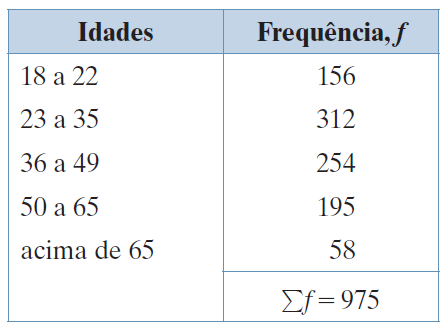

In [ ]:
import pandas as pd
# DataFrame com os dados da pesquisa
pesquisa = pd.DataFrame({'Frequência': [156, 312, 254, 195, 58]})
pesquisa.index = ['18 a 22', '23 a 35', '36 a 49', '50 a 65', 'acima de 65']
display(pesquisa)
# Cálculo das probabilidades
pesquisa['Probabilidades'] = pesquisa['Frequência']/pesquisa['Frequência'].sum()*100
display(pesquisa)

,Frequência
18 a 22,156
23 a 35,312
36 a 49,254
50 a 65,195
acima de 65,58


,Frequência,Probabilidades
18 a 22,156,16.000000
23 a 35,312,32.000000
36 a 49,254,26.051282
50 a 65,195,20.000000
acima de 65,58,5.948718


# A lei dos grandes núeros em ação

Se uma moeda é não-viesada, as probabilidades de cara ou coroa em um lançamento são iguais. Assim, na medida em que o núemro de lançamentos cresce, a probabilidade empírica (frequência relativa) deve se aproximar da probabilidade real de 50%.

O código abaixo simula 100 experimentos com um número de lançamentos que varia de 1 a 5000.A representação gráfica mostra a evolução das proporções de "cara" em cada um dos experimentos.

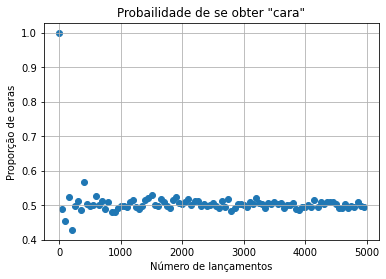

In [ ]:
import random
import matplotlib.pyplot as plt

# Função para lançamentos da moeda
def moeda(lancamentos):
  cara = 0
  for _ in range(lancamentos):
    if random.random() <= 0.5:
        cara +=1
  return cara/lancamentos

# Função para geração de cada experimento
def experimentos(lista_lancamentos):
    proporcoes = []
    for n_lancamento in lista_lancamentos:
        proporcoes.append(moeda(n_lancamento))
    return proporcoes

# Simulação
testes = list(range(1,5000,50))
resultados = experimentos(testes)
# Representação gráfica
plt.scatter(testes, resultados)
plt.title('Probailidade de se obter "cara"')
plt.xlabel('Número de lançamentos')
plt.ylabel('Proporção de caras')
plt.grid()

# Probabilidades condicionais - Esportes
O conjunto de dados a seguir relaciona os esportes preferidos de 300 pessoas. Execute o código e inspecione algumas linhas do DataFrame.

In [ ]:
import pandas as pd
import numpy as np

# Criação do pandas DataFrame
esportes = pd.DataFrame({'gênero': np.repeat(np.array(['Masculino', 'Feminino']), 150),
                         'esporte': np.repeat(np.array(['Beisebol', 'Basquete',
                                                        'Futebol', 'Vôlei',
                                                        'Beisebol', 'Basquete',
                                                        'Futebol', 'Vôlei']),
                                              (34, 40, 58, 18, 34, 52, 20, 44))})
# Inspeção de algumas linhas do painel de dados
display(esportes.head())
display(esportes.tail())


,gênero,esporte
0,Masculino,Beisebol
1,Masculino,Beisebol
2,Masculino,Beisebol
3,Masculino,Beisebol
4,Masculino,Beisebol


,gênero,esporte
295,Feminino,Vôlei
296,Feminino,Vôlei
297,Feminino,Vôlei
298,Feminino,Vôlei
299,Feminino,Vôlei


## Tabela de distribuição conjunta de frequências
O cálculo de probabiidades condicionais fica facilitado a partir de uma tabela de distribuição conjunta de frequências. No caso desse exemplo, a tabela indicará as ocorrências de cada esporte em função do gênero do entrevistado. As colunas e linhas de rótulo "All" revelam os totais de ocorrências.

In [ ]:
# Construção da tabela de distrbuição conjunta
dist_conj = pd.crosstab(index=esportes['gênero'],
                        columns=esportes['esporte'], margins=True)
# Inspeção da tabela de distribuição conjunta
display(dist_conj)

esporte,Basquete,Beisebol,Futebol,Vôlei,All
gênero,,,,,
Feminino,52,34,20,44,150
Masculino,40,34,58,18,150
All,92,68,78,62,300


## Cálculo de probabilidades condicionais
Use a tabela de distribuição conjunta da cálula anterior e calcule a probabilidade de que um indivíduo sorteado aleatoriamente:

*   seja do gênero masculino, visto que seu esporte preferido é o beisebol.
*   tenha por esporte preferido o basquete, dado que seja do gênero feminino.

No cáclulo dessas probabilidades, use o método iloc do pandas DataFrame para localizar a informação desejada em termos das coordenadas de linha e coluna da tabela de distribuição conjunta.



In [ ]:
# Probabilidade de ser do gênero masculino, dado que é fã de beisebol
prob = dist_conj.iloc[1, 1] / dist_conj.iloc[2, 1]
print(f'P(Masculino|Beisebol) = {prob*100:.2f}%')

# Probabilidade de ser fã de basquete, dado que é do gênero feminino
prob = dist_conj.iloc[0, 0] / dist_conj.iloc[0, 4]
print(f'P(Basquete|Feminino) = {prob*100:.2f}%')

P(Masculino|Beisebol) = 50.00%
P(Basquete|Feminino) = 34.67%


## Distribuição conjunta normalizada pelas colunas

Para determinar todas as probabilidades condicionais do tipo P(Gênero|Esporte), basta normalizar a tabela de distribuição conjunta usando as colunas.

In [ ]:
''' Tabela de distribuição conjunta normalizada pelas colunas: Em nosso exemplo,
exibe todas as probabilidades condicionais do tipo P(Gênero|Esporte)'''
dist_conj_colunas = pd.crosstab(index=esportes['gênero'],
                                columns=esportes['esporte'],
                                margins=True, normalize='columns')
# Inspeção da tabela
display(dist_conj_colunas)

esporte,Basquete,Beisebol,Futebol,Vôlei,All
gênero,,,,,
Feminino,0.565217,0.5,0.25641,0.709677,0.5
Masculino,0.434783,0.5,0.74359,0.290323,0.5


## Distribuição conjunta normalizada pelas linhas (índice)

Em contraste, para determinar todas as probabilidades condicionais do tipo P(Esporte|Gênero), basta normalizar a tabela de distribuição conjunta usando as linhas (ou seja, os índices).

In [ ]:
''' Tabela de distribuição conjunta normalizada pelas linhas: Em nosso exemplo,
exibe todas as probabilidades condicionais do tipo P(Esporte|Gênero)'''
dist_conj_linhas = pd.crosstab(index=esportes['gênero'],
                               columns=esportes['esporte'],
                               margins=True, normalize='index')
# Inspeção da tabela
display(dist_conj_linhas)

esporte,Basquete,Beisebol,Futebol,Vôlei
gênero,,,,
Feminino,0.346667,0.226667,0.133333,0.293333
Masculino,0.266667,0.226667,0.386667,0.120000
All,0.306667,0.226667,0.260000,0.206667


# Probabilidades condicionais - automóveis
O conjunto de dados a seguir reune informações sobre a montadora, o modelo, o tipo e a classificação (nota atribuída por imprensa qualificada) de alguns automóveis.

In [ ]:
# Construção do conjunto de dados
auto = pd.DataFrame({'montadora': ['ford', 'chevy', 'ford',
                                   'ford', 'ford', 'toyota'],
                     'modelo': ['mustang', 'camaro', 'fiesta',
                                'focus', 'taurus', 'camry'],
                     'nota': ['A', 'B', 'C', 'A', 'B', 'B'],
                     'tipo': ['coupe', 'coupe', 'sedan',
                              'sedan', 'sedan', 'sedan']})
# Inspeção da tabela
display(auto)

,montadora,modelo,nota,tipo
0,ford,mustang,A,coupe
1,chevy,camaro,B,coupe
2,ford,fiesta,C,sedan
3,ford,focus,A,sedan
4,ford,taurus,B,sedan
5,toyota,camry,B,sedan


Construa a tabela de distrbuição conjunta de frequências usando o tipo do automóvel como indexador de linhas e as respectivas notas como colunas. A seguir, calcule a probabilidade de um automóvel:

*   ser classificado com nota A, dado que é do tipo sedan.
*   ser do tipo coupe, dado que foi avaliado com nota B.



In [ ]:
# Construção da tabela de distribuição conjunta
tabela = pd.crosstab(auto.tipo, auto.nota, margins=True)
# Inspeção da tabela
display(tabela)
# Cálculo das probabilidades
prob1 = tabela.iloc[1, 0] / tabela.iloc[1, 3]
print(f'P(A|sedan) = {prob1*100:.2f}%')
prob2 = tabela.iloc[0, 1] / tabela.iloc[2, 1]
print(f'P(coupe|B) = {prob2*100:.2f}%')

nota,A,B,C,All
tipo,,,,
coupe,1,1,0,2
sedan,1,2,1,4
All,2,3,1,6


P(A|sedan) = 25.00%
P(coupe|B) = 33.33%


Verifique seus cálculos ao construir versões da tabela de distribuição conjunta normalizadas pelas colunas e linhas.

In [ ]:
# Probabilidades condicionais: P(nota|tipo)
print('** Probabilidades condicionais: P(nota|tipo) **')
tabela_linhas = pd.crosstab(auto.tipo, auto.nota,
                            margins=True, normalize="index")
display(tabela_linhas)
# Probabilidades condicionais: P(tipo|nota)
print('** Probabilidades condicionais: P(tipo|nota) **')
tabela_colunas = pd.crosstab(auto.tipo, auto.nota,
                             margins=True, normalize="columns")
display(tabela_colunas)

** Probabilidades condicionais: P(nota|tipo) **


nota,A,B,C
tipo,,,
coupe,0.500000,0.5,0.000000
sedan,0.250000,0.5,0.250000
All,0.333333,0.5,0.166667


** Probabilidades condicionais: P(tipo|nota) **


nota,A,B,C,All
tipo,,,,
coupe,0.5,0.333333,0.0,0.333333
sedan,0.5,0.666667,1.0,0.666667


# **TTI109 - Estatística**
# **Aula 09 - Distribuições Discretas de Probabilidade 01**

Nessa aula vamos aprender a:

* Identificar variáveis aleatórias discretas;
* Construir uma distribuição discreta de probabilidades para uma variável aleatória (discreta);
* Calcular a média, a variância e o desvio padrão de uma distribuição discreta de probabilidades.

## Distribuição discreta de probabilidades
Uma empresa rastreia o número de vendas que os novos colaboradores
fazem todos os dias, durante um período de experiência de 100 dias. Os
resultados de um novo colaborador estão indicados na tabela a seguir.

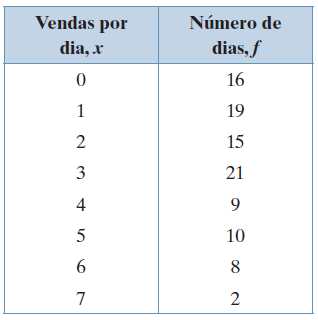

*   Organize as probabilidades em uma distribuição de probabilidade.
*   Represente graficamente a distribuição de probabilidades e a probabilidade acumulada.

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Conjunto de dados
tabela = pd.DataFrame({'Vendas/dia': list(range(8)),
                       'Num_dias': [16, 19, 15, 21, 9, 10, 8, 2]})
display(tabela)

,Vendas/dia,Num_dias
0,0,16
1,1,19
2,2,15
3,3,21
4,4,9
5,5,10
6,6,8
7,7,2


In [ ]:
# Cálculo das probabilidades
total_vendas = tabela['Num_dias'].sum()
tabela['P(x)'] = tabela['Num_dias']/total_vendas
display(tabela)

,Vendas/dia,Num_dias,P(x)
0,0,16,0.16
1,1,19,0.19
2,2,15,0.15
3,3,21,0.21
4,4,9,0.09
5,5,10,0.10
6,6,8,0.08
7,7,2,0.02


In [ ]:
# Cálculo da probabilidade acumulada
tabela['P_ac(x)'] = tabela['P(x)'].cumsum()
display(tabela)

,Vendas/dia,Num_dias,P(x),P_ac(x)
0,0,16,0.16,0.16
1,1,19,0.19,0.35
2,2,15,0.15,0.50
3,3,21,0.21,0.71
4,4,9,0.09,0.80
5,5,10,0.10,0.90
6,6,8,0.08,0.98
7,7,2,0.02,1.00


## Representação gráfica da distribuição discreta de probabilidades

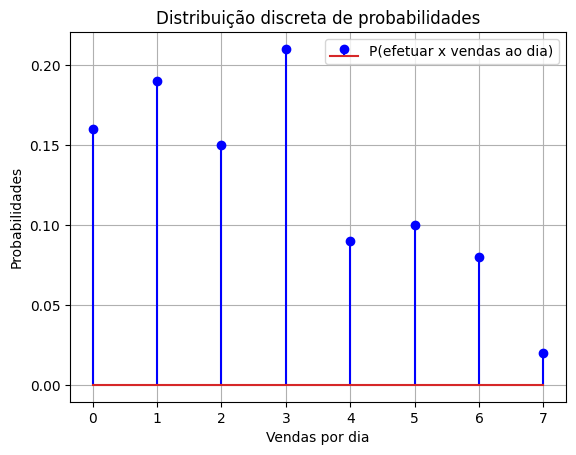

In [ ]:
# Gráfico de segmentos verticais (caules)
plt.stem(tabela['Vendas/dia'], tabela['P(x)'], linefmt='b-',
         label='P(efetuar x vendas ao dia)')
plt.xlabel('Vendas por dia')
plt.ylabel('Probabilidades')
plt.title('Distribuição discreta de probabilidades')
plt.grid()
plt.legend()
plt.show()

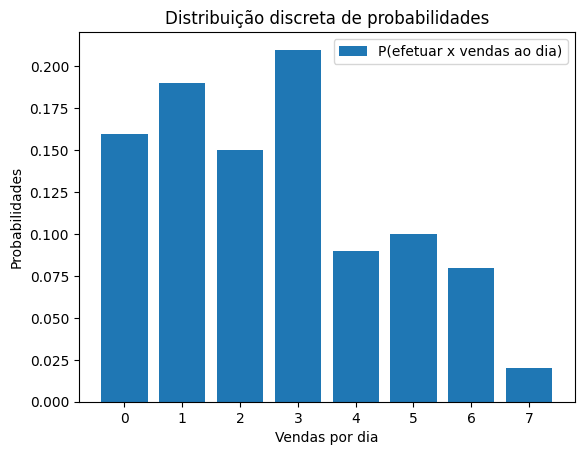

In [ ]:
# Gráfico de barras verticais
plt.bar(tabela['Vendas/dia'], tabela['P(x)'],
        label='P(efetuar x vendas ao dia)')
plt.xlabel('Vendas por dia')
plt.ylabel('Probabilidades')
plt.title('Distribuição discreta de probabilidades')
plt.grid(False)
plt.legend()
plt.show()

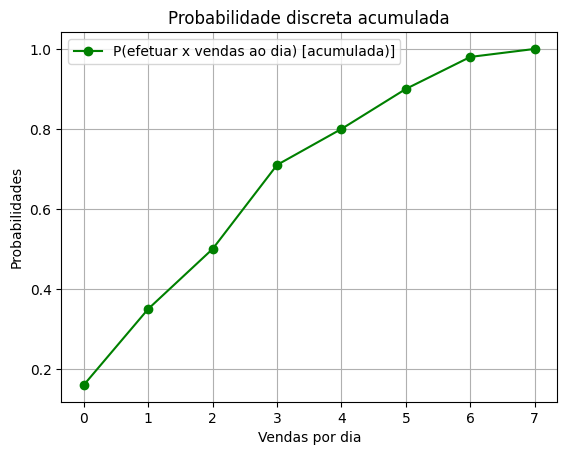

In [ ]:
# Representação gráfica da probabilidade discreta acumulada
plt.plot(tabela['Vendas/dia'], tabela['P_ac(x)'], 'g-o',
         label='P(efetuar x vendas ao dia) [acumulada)]')
plt.xlabel('Vendas por dia')
plt.ylabel('Probabilidades')
plt.title('Probabilidade discreta acumulada')
plt.grid()
plt.legend()
plt.show()

## Média de uma distribuição discreta de probabilidades
Calcule a média da distribuição estudada no item anterior.

In [ ]:
# Inserção da coluna Vendas*Probabilidades
tabela['xP(x)'] = tabela['Vendas/dia']*tabela['P(x)']
display(tabela)

,Vendas/dia,Num_dias,P(x),P_ac(x),xP(x)
0,0,16,0.16,0.16,0.00
1,1,19,0.19,0.35,0.19
2,2,15,0.15,0.50,0.30
3,3,21,0.21,0.71,0.63
4,4,9,0.09,0.80,0.36
5,5,10,0.10,0.90,0.50
6,6,8,0.08,0.98,0.48
7,7,2,0.02,1.00,0.14


In [ ]:
# Cálculo da média da distribuição
media = tabela['xP(x)'].sum()
print(f'A média da distribuição é de {media:.1f} vendas/dia.')

A média da distribuição é de 2.6 vendas/dia.


# Variância e desvio padrão de uma distribuição discreta de probabilidades
Calcule a variância e o desvio padrão da distribuição estudada nos itens anteriores.

In [ ]:
# Inserção da coluna Vendas^2*Probabilidades
tabela['x^2P(x)'] = tabela['Vendas/dia']**2 * tabela['P(x)']
display(tabela)

,Vendas/dia,Num_dias,P(x),P_ac(x),xP(x),x^2P(x)
0,0,16,0.16,0.16,0.00,0.00
1,1,19,0.19,0.35,0.19,0.19
2,2,15,0.15,0.50,0.30,0.60
3,3,21,0.21,0.71,0.63,1.89
4,4,9,0.09,0.80,0.36,1.44
5,5,10,0.10,0.90,0.50,2.50
6,6,8,0.08,0.98,0.48,2.88
7,7,2,0.02,1.00,0.14,0.98


In [ ]:
# Cálculo da variância da distribuição
variancia = tabela['x^2P(x)'].sum() - media**2
print(f'A variância da distribuição é de {variancia:.1f} (vendas/dia)^2.')

A variância da distribuição é de 3.7 (vendas/dia)^2.


In [ ]:
# Cálculo do desvio padrão da distribuição
desvio = variancia**(1/2)
print(f'O desvio padrão da distribuição é de {desvio:.1f} vendas/dia.')

O desvio padrão da distribuição é de 1.9 vendas/dia.


## Calculando algumas probabilidades

Usando a distribuição de probabilidades construída anteriormente calcule a probabilidade de que um vendedor iniciante efetue:

* exatamente 4 vendas em um único dia;
* menos de 4 vendas em um único dia;
* mais de 4 vendas em um único dia.

In [ ]:
# Revendo a distribuição de probabilidades
display(tabela)

,Vendas/dia,Num_dias,P(x),P_ac(x),xP(x),x^2P(x)
0,0,16,0.16,0.16,0.00,0.00
1,1,19,0.19,0.35,0.19,0.19
2,2,15,0.15,0.50,0.30,0.60
3,3,21,0.21,0.71,0.63,1.89
4,4,9,0.09,0.80,0.36,1.44
5,5,10,0.10,0.90,0.50,2.50
6,6,8,0.08,0.98,0.48,2.88
7,7,2,0.02,1.00,0.14,0.98


In [ ]:
# P(4 vendas em um único dia)
tab_filtrada = tabela['P(x)'].loc[tabela['Vendas/dia'] == 4]
print(tab_filtrada)
prob = tab_filtrada.values[0]
print(f'P(4 vendas em um único dia) = {prob*100:.1f}%')

4    0.09
Name: P(x), dtype: float64
P(4 vendas em um único dia) = 9.0%


In [ ]:
# P(menos de 4 vendas em um único dia)
tab_filtrada = tabela['P(x)'].loc[tabela['Vendas/dia'] < 4]
print(tab_filtrada)
prob = tab_filtrada.sum()
print(f'P(menos de 4 vendas em um único dia) = {prob*100:.1f}%')

0    0.16
1    0.19
2    0.15
3    0.21
Name: P(x), dtype: float64
P(menos de 4 vendas em um único dia) = 71.0%


In [ ]:
# P(mais de 4 vendas em um único dia)
tab_filtrada = tabela['P(x)'].loc[tabela['Vendas/dia'] > 4]
print(tab_filtrada)
prob = tab_filtrada.sum()
print(f'P(mais de 4 vendas em um único dia) = {prob*100:.1f}%')

5    0.10
6    0.08
7    0.02
Name: P(x), dtype: float64
P(mais de 4 vendas em um único dia) = 20.0%


# **TTI109 - Estatística**
# **Aula 10 - Distribuições Discretas de Probabilidade 02**

Nessa aula vamos aprender a:

* Identificar experimentos binomiais;
* Descrever e calcular probabilidades binomiais;
* Calcular a média, a variância e o desvio padrão de uma distribuição binomial.

# Distribuição de Probabilidade Binomial
Em uma pesquisa, indivíduos adultos foram solicitados para que indicassem quais dispositivos utilizavam para acessar mídias sociais. Os resultados estão na figura.

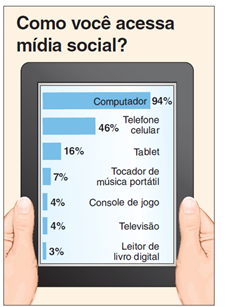

Sete adultos que participaram da pesquisa são selecionados aleatoriamente e indagados se utilizam um
telefone celular para acessar mídia social. Construa uma distribuição de probabilidade binomial para o número de adultos que respondeu sim. A seguir, represente graficamente essa distrbuição usando gráficos de segmentos e barras verticais.

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom #importa a distribuição binomial

In [ ]:
# Número de experimentos (número de entrevistados)
exp = 7

# Probabilidade de sucesso (acesso às redes sociais via celular)
sucesso = 0.46

# Valores possíveis para a v.a. x (qtde de sucessos em exp tentativas)
val_x = [0, 1, 2, 3, 4, 5, 6, 7]

In [ ]:
# Geração da tabela de distribuição de probabilidade binomial
dist_binomial = pd.DataFrame({'Sucessos': val_x})  #cria tabela o data frame com sucesso no cabecalho da tabela e de 0 a 7
dist_binomial['P(x)'] = binom.pmf(k = val_x, n=exp, p=sucesso) #mede os sucessos que estão a direita dos valores e k sao os valores que o x posde assumir, n é o numero de tentativas e p é a probabilidade de sucesso. Ai ele calcula pra voce cada probabilidade
display(dist_binomial)

,Sucessos,P(x)
0,0,0.013389
1,1,0.079840
2,2,0.204035
3,3,0.289679
4,4,0.246763
5,5,0.126123
6,6,0.035813
7,7,0.004358


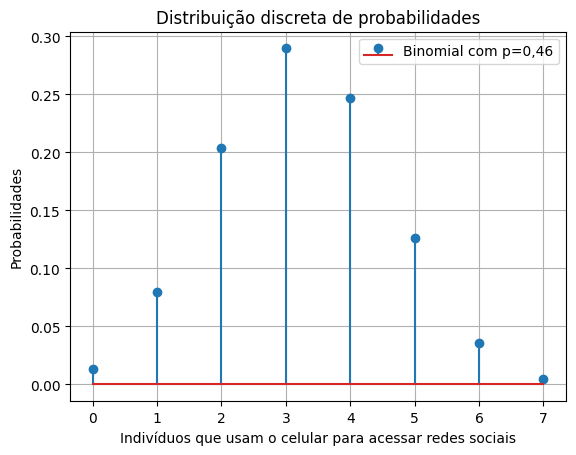

In [ ]:
# Representação gráfica da distribuição discreta de probabilidades
# Gráfico de segmentos verticais (caules)
plt.stem(dist_binomial['Sucessos'], dist_binomial['P(x)'], label='Binomial com p=0,46')
plt.xlabel('Indivíduos que usam o celular para acessar redes sociais')
plt.ylabel('Probabilidades')
plt.title('Distribuição discreta de probabilidades')
plt.grid()
plt.legend()
plt.show()

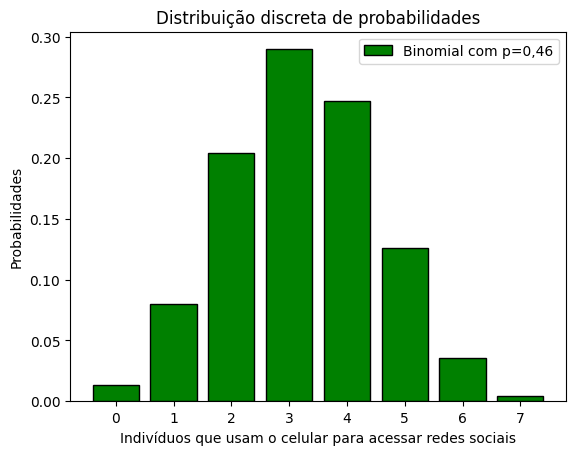

In [ ]:
# Representação gráfica da distribuição discreta de probabilidades
# Gráfico de barras verticais
plt.bar(dist_binomial['Sucessos'], dist_binomial['P(x)'],
         color='green', edgecolor='black',
         label='Binomial com p=0,46')
plt.xlabel('Indivíduos que usam o celular para acessar redes sociais')
plt.ylabel('Probabilidades')
plt.title('Distribuição discreta de probabilidades')
plt.grid(False)
plt.legend()
plt.show()

# Parâmetros populacionais de uma distribuição binomial
Calcule a média, a variância e o desvio padrão da distribuição binomial do item anterior.

In [ ]:
# ** Cálculo dos parâmetros usando as fórmulas **

# Cálculo da média (mu = np)
media = sucesso * exp

# Cálculo da variância (sigma^2 = np(1-p))
variancia = exp * sucesso * (1-sucesso)

# Cálculo do desvio padrão
desv_pad = variancia**(1/2)

# Exibição dos resultados
print('** Parâmetros populacionais - Fórmulas **')
print(f'Média = {media:.2f} indivíduos')
print(f'Variância = {variancia:.2f} indivíduos^2')
print(f'Desvio padrão = {desv_pad:.2f} indivíduos')

** Parâmetros populacionais - Fórmulas **
Média = 3.22 indivíduos
Variância = 1.74 indivíduos^2
Desvio padrão = 1.32 indivíduos


In [ ]:
# Cálculo dos parâmetros usando o método stats de binom
med, var = binom.stats(n=exp, p=sucesso)
print('** Parâmetros populacionais - stats **')
print(f'Média = {med:.2f} indivíduos\nVariância = {var:.2f} indivíduos^2')

** Parâmetros populacionais - stats **
Média = 3.22 indivíduos
Variância = 1.74 indivíduos^2


# Mais probabilidades binomiais
Uma pesquisa com adultos americanos descobriu que 62% das mulheres acreditam que há uma ligação entre jogos violentos e adolescentes que apresentam comportamento violento. Você seleciona aleatoriamente
quatro mulheres americanas e pergunta se elas acreditam nessa ligação entre jogos e comportamento violentos. Encontre a probabilidade de que:


*   exatamente duas mulheres respondam sim
*   ao menos duas mulheres respondam sim
*   menos de duas mulheres responderam sim





In [ ]:
# Condições do experimento probabilístico binomial
exp = 4
sucesso = 0.62
val_x = [0, 1, 2, 3, 4]

In [ ]:
# Geração da tabela de distribuição de probabilidade binomial
dist_binomial = pd.DataFrame({'Sucessos': val_x})
dist_binomial['P(x)'] = binom.pmf(k=val_x, n=exp, p=sucesso)
display(dist_binomial)

,Sucessos,P(x)
0,0,0.020851
1,1,0.136083
2,2,0.333044
3,3,0.362259
4,4,0.147763


In [ ]:
# Cálculo das probabilidades
# prob1 = prob. exatamente duas mulheres respondam sim (x=2)
prob1 = dist_binomial['P(x)'][2] #vai la na tabela e procura a probabilidade de que duas mulheres repondam sim
print(f'A probabilidade de que exatamente duas mulheres respondam sim é {prob1*100:.1f}%')

A probabilidade de que exatamente duas mulheres respondam sim é 33.3%


In [ ]:
# Forma alternativa
prob1 = binom.pmf(k=2, n=exp, p=sucesso)
print(f'A probabilidade de que exatamente duas mulheres respondam sim é {prob1*100:.1f}%')

A probabilidade de que exatamente duas mulheres respondam sim é 33.3%


In [ ]:
# prob2 = prob. ao menos duas mulheres respondam sim (x>=2)
criterio = dist_binomial['Sucessos'] >= 2
prob2 = dist_binomial['P(x)'].loc[criterio].sum() #vai na tabela no p(x) e encontra todas os eleemtnos que condizem com meu criteiro e soma esses valores
print(f'A probabilidade de que ao menos duas mulheres respondam sim é {prob2*100:.1f}%')

A probabilidade de que ao menos duas mulheres respondam sim é 84.3%


In [ ]:
#Forma alternativa -> survival function sf
valor = 2
prob2 = binom.sf(k=valor-1, n=exp, p=sucesso)
prob2

0.84306608

In [ ]:
# prob3 = prob. menos de duas mulheres respondam sim (x<2)
criterio = dist_binomial['Sucessos'] < 2
prob3 = dist_binomial['P(x)'].loc[criterio].sum() #vai na tabela no p(x) e encontra todas os eleemtnos que condizem com meu criteiro e soma esses valores
print(f'A probabilidade de que menos de duas mulheres respondam sim é {prob3*100:.1f}%')
# IMPORTANTE: note que o complemento de “x é pelo menos 2” é
# “x é menos que 2”. Logo: P(x<2) = 1-P(x>=2) = 1-0.843 = 0.157'''

A probabilidade de que menos de duas mulheres respondam sim é 15.7%


In [ ]:
#Forma alternativa- Função cdf (esquerda do valor) - pmf (direita do valor), sf (exatamento o valor)
valor = 2
prob3 = binom.cdf(k=valor-1, n=exp, p=sucesso)
prob3

0.15693392